# Bank Churners Dataset

#### The dataset contains 10,127 entries and 21 columns.

- CLIENTNUM: Client number, a unique identifier.
- Attrition_Flag: Indicates if the customer is an existing customer or has churned.
- Customer_Age: Age of the customer.
- Gender: Gender of the customer.
- Dependent_count: Number of dependents.
- Education_Level: Educational level.
- Marital_Status: Marital status.
- Income_Category: Category of income.
- Card_Category: Type of card.
- Months_on_book: Number of months the customer has been with the bank.
- Total_Relationship_Count: Total number of products the customer has with the bank.
- Months_Inactive_12_mon: Number of months inactive in the last 12 months.
- Contacts_Count_12_mon: Number of contacts with the customer in the last 12 months.
- Credit_Limit: Credit limit on the customer’s credit cards.
- Total_Revolving_Bal: Total revolving balance on the credit card.
- Avg_Open_To_Buy: Average open to buy credit line (average of last 12 months).
- Total_Amt_Chng_Q4_Q1: Change in transaction amount (Q4 over Q1).
- Total_Trans_Amt: Total transaction amount in the last 12 months.
- Total_Trans_Ct: Total transaction count in the last 12 months.
- Total_Ct_Chng_Q4_Q1: Change in transaction count (Q4 over Q1).
- Avg_Utilization_Ratio: Average card utilization ratio.

## Importing Libraries

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency


## Data Loading and Initial Inspection

In [2]:
file_path = '/Users/kusumsaichowdary/Downloads/Final_BankChurners.csv'
data = pd.read_csv(file_path)

data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

#### The dataset includes various types of data: integer (int64), floating-point (float64), and objects (likely strings).

### Statistical summary of features

In [4]:

statistical_summary = data.describe()

statistical_summary


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [5]:
categorical_stats = data.describe(include=['object'])
categorical_stats

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [6]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_distribution = {column: data[column].value_counts() for column in categorical_columns}

categorical_distribution



{'Attrition_Flag': Existing Customer    8500
 Attrited Customer    1627
 Name: Attrition_Flag, dtype: int64,
 'Gender': F    5358
 M    4769
 Name: Gender, dtype: int64,
 'Education_Level': Graduate         3128
 High School      2013
 Unknown          1519
 Uneducated       1487
 College          1013
 Post-Graduate     516
 Doctorate         451
 Name: Education_Level, dtype: int64,
 'Marital_Status': Married     4687
 Single      3943
 Unknown      749
 Divorced     748
 Name: Marital_Status, dtype: int64,
 'Income_Category': Less than $40K    3561
 $40K - $60K       1790
 $80K - $120K      1535
 $60K - $80K       1402
 Unknown           1112
 $120K +            727
 Name: Income_Category, dtype: int64,
 'Card_Category': Blue        9436
 Silver       555
 Gold         116
 Platinum      20
 Name: Card_Category, dtype: int64}

## EDA

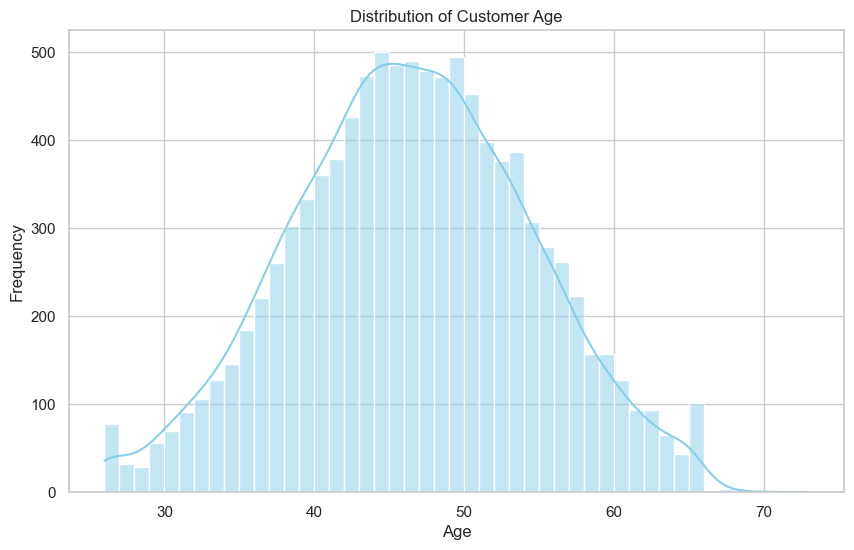

In [7]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data['Customer_Age'], kde=True, color="skyblue")
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Observations:
- Distribution Shape: The distribution of 'Customer_Age' appears to be fairly symmetrical, suggesting a normal-like distribution.
- Central Tendency: The age of customers clusters around the mid-40s, indicating this is the most common age group in the dataset.
- Spread: The age range extends from the mid-20s to early 70s, with a concentration of data points in the 40-55 age range.
- Outliers: There do not appear to be any significant outliers, as the distribution tails off smoothly at both ends.
- Overall Interpretation: The customer base seems to be middle-aged, with a balanced age distribution. This might reflect a broad appeal of the bank's services across different age groups.

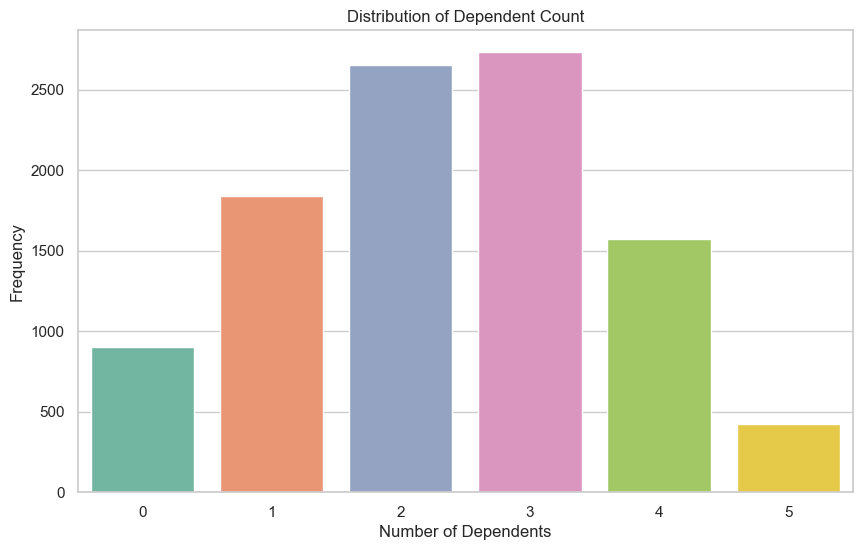

In [8]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Dependent_count', data=data, palette="Set2")
plt.title('Distribution of Dependent Count')
plt.xlabel('Number of Dependents')
plt.ylabel('Frequency')
plt.show()


Observations:
- Distribution Shape: The distribution of 'Dependent_count' is skewed to the right. Most customers have a smaller number of dependents.
- Most Common Values: The most common number of dependents is between 0 to 3. This range accounts for the majority of the customers in the dataset.
- Range and Spread: The 'Dependent_count' ranges from 0 to 5. There is a noticeable decrease in frequency as the number of dependents increases.
- Outliers: There are no apparent outliers; the values fall within a reasonable range for the number of dependents.
- Overall Interpretation: The data suggests that a significant portion of the bank's customers have few or no dependents, which might be indicative of the customer demographics, such as younger individuals or smaller families.

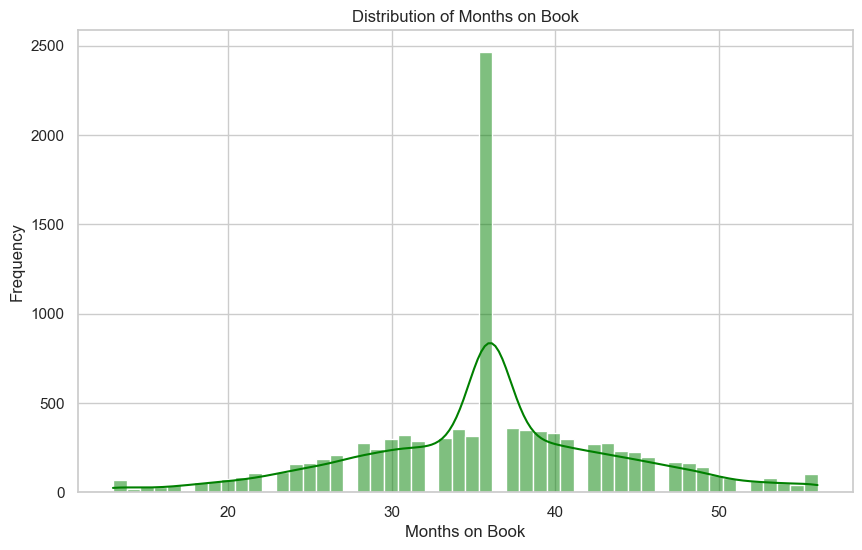

In [9]:

plt.figure(figsize=(10, 6))
sns.histplot(data['Months_on_book'], kde=True, color="green")
plt.title('Distribution of Months on Book')
plt.xlabel('Months on Book')
plt.ylabel('Frequency')
plt.show()


Observations:
- Distribution Shape: The distribution of 'Months_on_book' is somewhat bell-shaped, indicating a tendency towards a normal distribution, but with some irregularities.
- Central Tendency: There's a noticeable concentration of customers who have been with the bank for around 30 to 40 months.
- Spread: The range extends from about 13 to 56 months, covering a wide span of customer-bank relationships in terms of duration.
- Outliers: The distribution appears consistent throughout its range without significant outliers.
- Overall Interpretation: The data suggests a diverse range of customer tenure, with a significant number of customers having a moderate length of relationship with the bank. This spread indicates both relatively new and long-term customers.

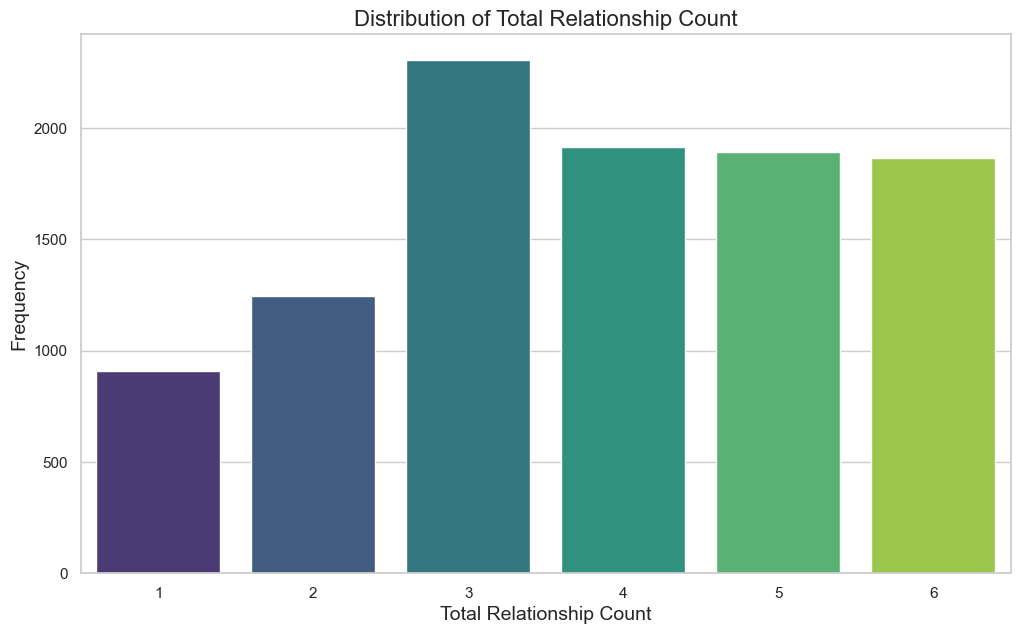

In [10]:

plt.figure(figsize=(12, 7))
sns.countplot(x='Total_Relationship_Count', data=data, palette="viridis")
plt.title('Distribution of Total Relationship Count', fontsize=16)
plt.xlabel('Total Relationship Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


Observations:
- Distribution: The distribution shows a range of relationships customers have with the bank, from 1 to 6 products or services.
- Common Counts: The most common counts are 3 and 4, indicating that a large number of customers engage with multiple bank services.
- Variation: There's a noticeable decrease in frequency as the count increases, with fewer customers having 5 or 6 relationships.
- Outliers: The graph does not indicate any outliers, as all counts fall within the expected range.
- Overall Interpretation: This distribution suggests a diverse customer base in terms of engagement with the bank's products. Most customers maintain a moderate number of relationships, which can be indicative of customer loyalty or satisfaction with the bank's offerings.

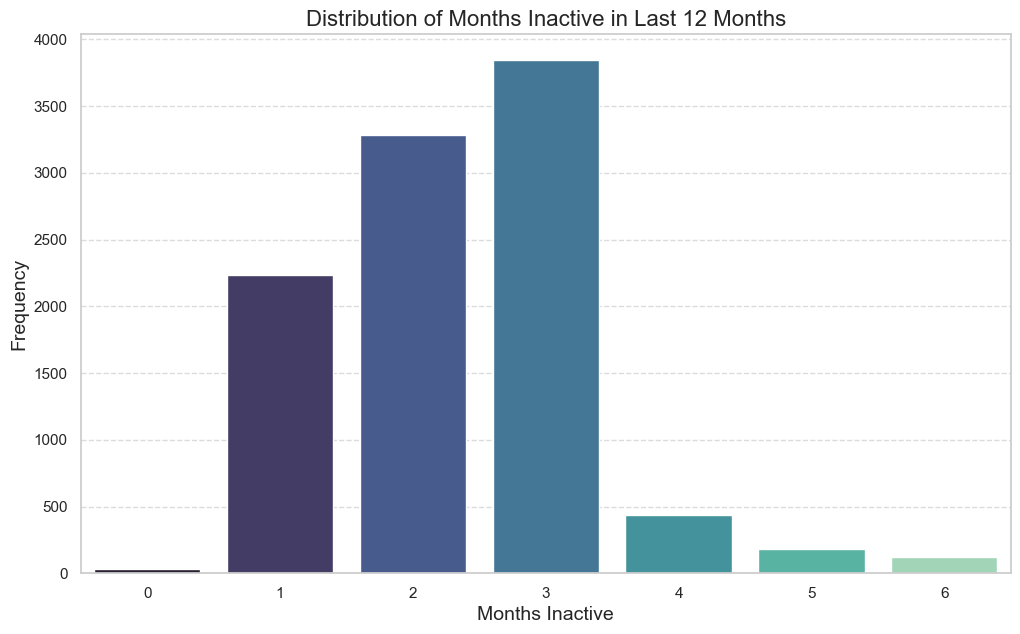

In [11]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Months_Inactive_12_mon', data=data, palette="mako")
plt.title('Distribution of Months Inactive in Last 12 Months', fontsize=16)
plt.xlabel('Months Inactive', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Observations:
- Distribution: The distribution shows the number of months customers were inactive in the last 12 months.
- Most Common Durations: The most common inactivity periods are 2 and 3 months. These counts are significantly higher than other values.
- Range: The inactivity period ranges from 0 to 6 months.
- Skewness: The distribution is right-skewed, with fewer customers having longer periods of inactivity.
- Outliers: There are no apparent outliers, and the values are within a reasonable range for inactivity periods.
- Overall Interpretation: Most customers have short periods of inactivity. Longer inactivity periods are less common, which might indicate good customer engagement or effective retention strategies by the bank.

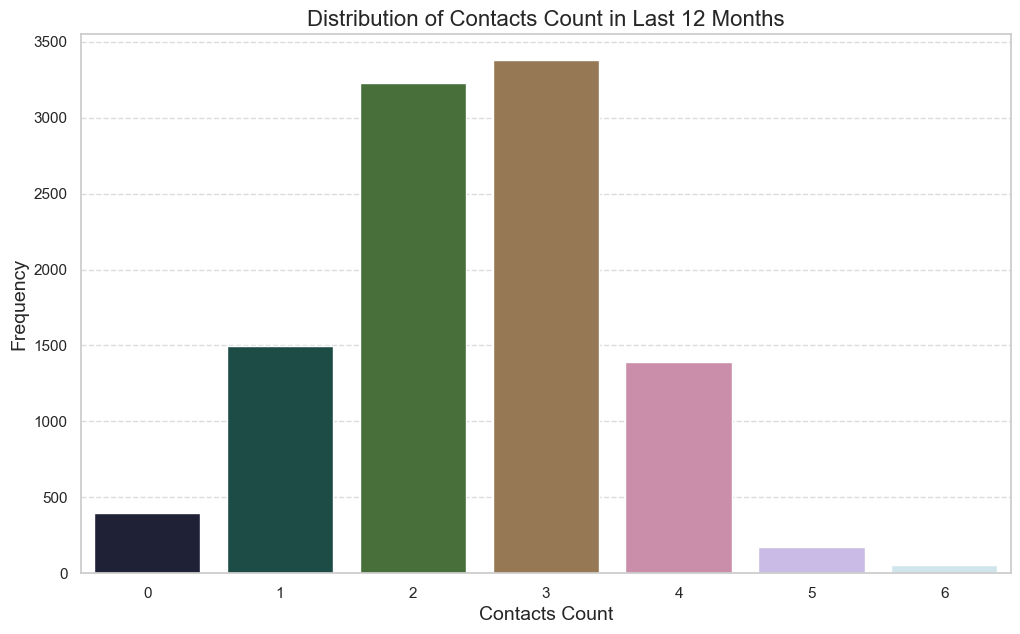

In [12]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Contacts_Count_12_mon', data=data, palette="cubehelix")
plt.title('Distribution of Contacts Count in Last 12 Months', fontsize=16)
plt.xlabel('Contacts Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Observations:
- Distribution: The graph represents the number of times customers contacted the bank in the last 12 months.
- Common Contact Counts: The most frequent contact counts are 2 and 3, indicating a moderate level of customer engagement with the bank.
- Range and Variation: The contact count ranges from 0 to 6, with a notable decrease in frequency as the count increases.
- Skewness: The distribution is right-skewed, showing that fewer customers have higher contact counts.
- Outliers: No significant outliers are observed; the distribution falls within a typical range for customer contacts.
- Overall Interpretation: This suggests that while a significant number of customers maintain regular contact with the bank, very frequent contacts (more than 4 times a year) are less common. This could reflect customer satisfaction or the effectiveness of the bank's self-service options.

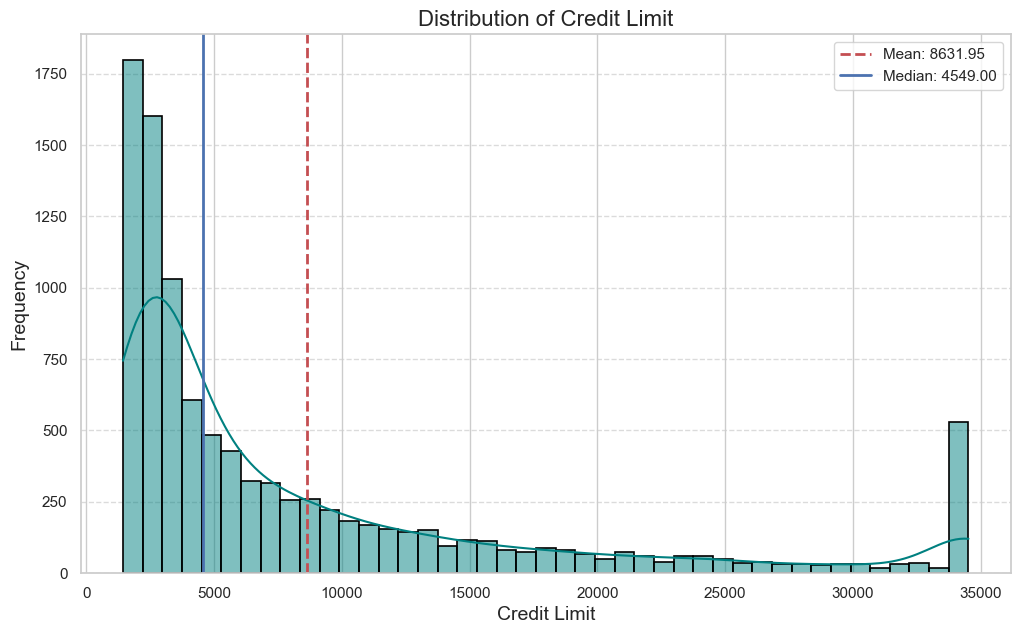

In [13]:
plt.figure(figsize=(12, 7))
sns.histplot(data['Credit_Limit'], kde=True, color="teal", edgecolor='black', linewidth=1.2)
plt.title('Distribution of Credit Limit', fontsize=16)
plt.xlabel('Credit Limit', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

mean_val = data['Credit_Limit'].mean()
median_val = data['Credit_Limit'].median()
plt.axvline(mean_val, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='b', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

plt.legend()
plt.show()


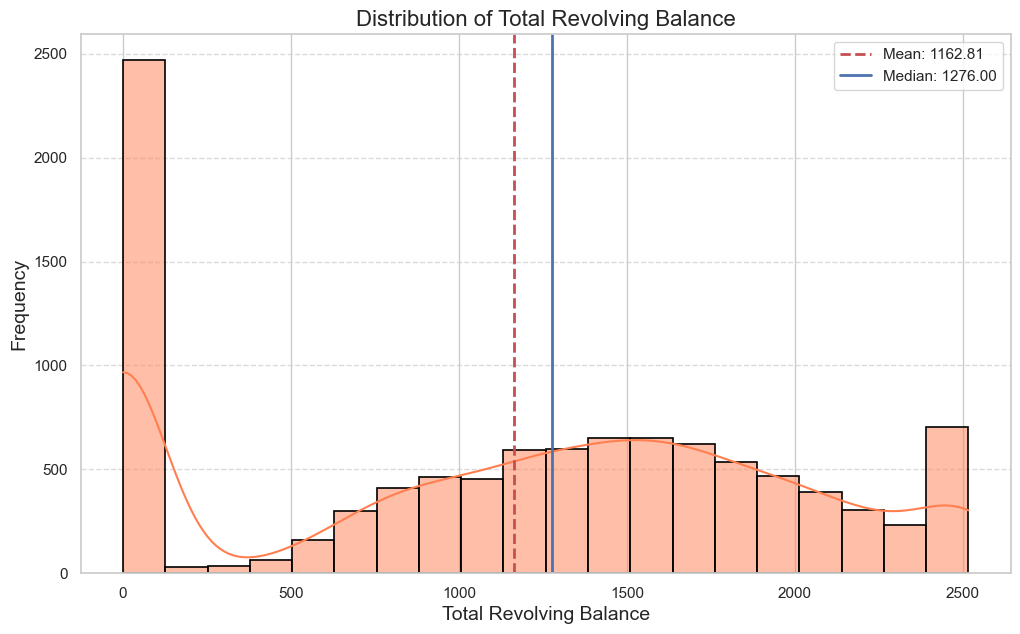

In [14]:
plt.figure(figsize=(12, 7))
sns.histplot(data['Total_Revolving_Bal'], kde=True, color="coral", edgecolor='black', linewidth=1.2)
plt.title('Distribution of Total Revolving Balance', fontsize=16)
plt.xlabel('Total Revolving Balance', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

mean_val = data['Total_Revolving_Bal'].mean()
median_val = data['Total_Revolving_Bal'].median()
plt.axvline(mean_val, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='b', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

plt.legend()
plt.show()


Observations:
- Distribution Shape: The distribution of 'Total_Revolving_Bal' (Total Revolving Balance) is somewhat multimodal, with peaks at different balance levels.
- Central Tendency: The mean and median are indicated on the graph. The presence of multiple peaks affects these measures of central tendency.
- Range and Spread: The balance ranges from 0 to a high value, with a significant number of customers having low revolving balances.
- Outliers: There are customers with very high revolving balances, but they are not excessively distant from the rest of the data.
- Overall Interpretation: The varied distribution suggests a diverse customer base in terms of revolving credit usage. The presence of a peak near zero may indicate a substantial number of customers who either pay off their balances regularly or don't use their revolving credit.

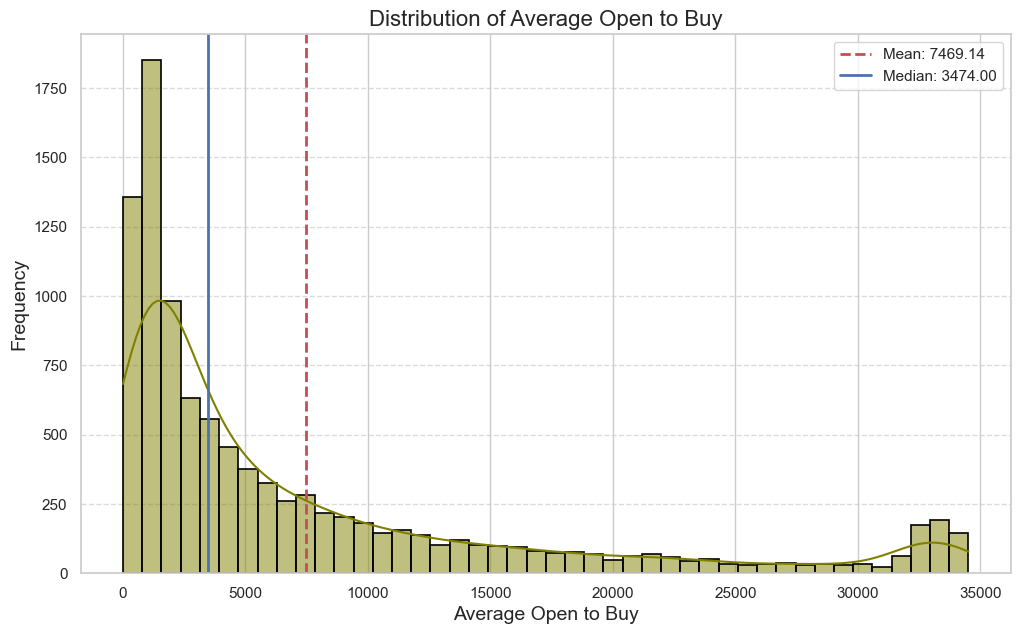

In [15]:
plt.figure(figsize=(12, 7))
sns.histplot(data['Avg_Open_To_Buy'], kde=True, color="olive", edgecolor='black', linewidth=1.2)
plt.title('Distribution of Average Open to Buy', fontsize=16)
plt.xlabel('Average Open to Buy', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

mean_val = data['Avg_Open_To_Buy'].mean()
median_val = data['Avg_Open_To_Buy'].median()
plt.axvline(mean_val, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='b', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

plt.legend()
plt.show()


Observations:
- Distribution Shape: The distribution of 'Avg_Open_To_Buy' is right-skewed, indicating that a majority of customers have lower amounts of unused credit.
- Central Tendency: The mean is notably higher than the median, as indicated by the respective red and blue lines. This discrepancy is typical in right-skewed distributions.
- Range and Spread: The range of 'Avg_Open_To_Buy' is extensive, showing that some customers have very high amounts of available credit, while many have relatively low amounts.
- Outliers: There are customers with exceptionally high 'Avg_Open_To_Buy' values, likely reflecting high credit limits or low revolving balances.
- Overall Interpretation: The distribution suggests that while most customers maintain lower levels of unused credit, a subset has significantly higher credit availability. This could indicate a segment of customers with higher financial capacity or more conservative spending habits.

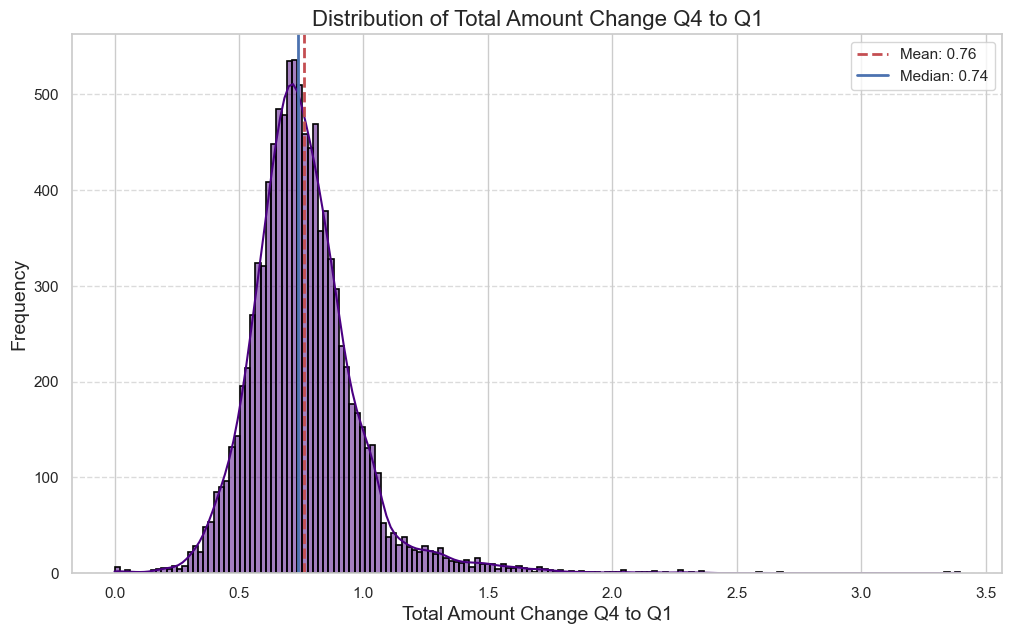

In [16]:
plt.figure(figsize=(12, 7))
sns.histplot(data['Total_Amt_Chng_Q4_Q1'], kde=True, color="indigo", edgecolor='black', linewidth=1.2)
plt.title('Distribution of Total Amount Change Q4 to Q1', fontsize=16)
plt.xlabel('Total Amount Change Q4 to Q1', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

mean_val = data['Total_Amt_Chng_Q4_Q1'].mean()
median_val = data['Total_Amt_Chng_Q4_Q1'].median()
plt.axvline(mean_val, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='b', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

plt.legend()
plt.show()


Observations:
- Distribution Shape: The distribution of 'Total_Amt_Chng_Q4_Q1' (Total Amount Change from Quarter 4 to Quarter 1) is right-skewed. Most values cluster at the lower end, indicating minor changes in transaction amounts for most customers.
- Central Tendency: The mean and median are close but slightly different, shown by the red and blue lines. The mean is slightly higher due to the tail on the right.
- Range and Spread: The range of changes is wide, with some customers experiencing significant changes in transaction amounts between quarters.
- Outliers: The graph shows potential outliers with very high transaction amount changes, which could be due to seasonal spending or other factors.
- Overall Interpretation: This skewness suggests that while most customers do not experience drastic changes in their transaction amounts, a small group sees significant fluctuations. This could be indicative of varied customer spending behaviors or life events affecting financial activities.

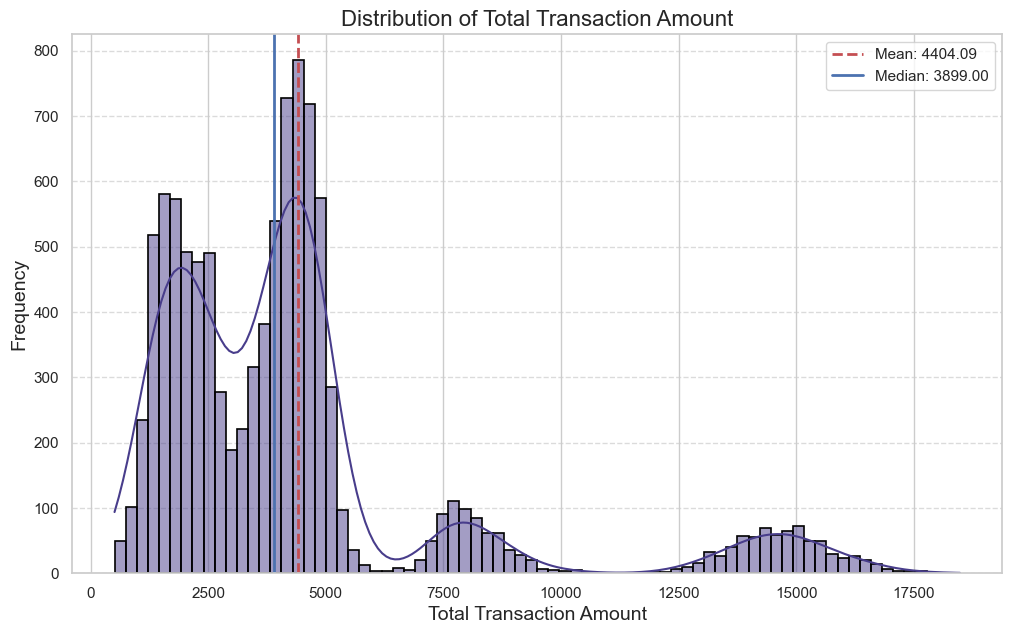

In [17]:
plt.figure(figsize=(12, 7))
sns.histplot(data['Total_Trans_Amt'], kde=True, color="darkslateblue", edgecolor='black', linewidth=1.2)
plt.title('Distribution of Total Transaction Amount', fontsize=16)
plt.xlabel('Total Transaction Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

mean_val = data['Total_Trans_Amt'].mean()
median_val = data['Total_Trans_Amt'].median()
plt.axvline(mean_val, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='b', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

plt.legend()
plt.show()


Observations:
- Distribution Shape: The distribution of 'Total_Trans_Amt' (Total Transaction Amount) is right-skewed, indicating that most customers have lower transaction amounts.
- Central Tendency: The mean is higher than the median, as shown by the red and blue lines, which is typical for right-skewed distributions. This difference suggests the presence of some high-transaction customers pulling the mean upwards.
- Range and Spread: The range is wide, with a few customers having very high total transaction amounts, as indicated by the long tail to the right.
- Outliers: The distribution suggests the presence of outliers with very high transaction amounts, which might be attributed to a small group of high-spending customers or occasional large transactions.
- Overall Interpretation: The skewed distribution indicates that while the majority of the bank's customers have modest transaction volumes, a smaller number engage in more significant spending or transaction activities.

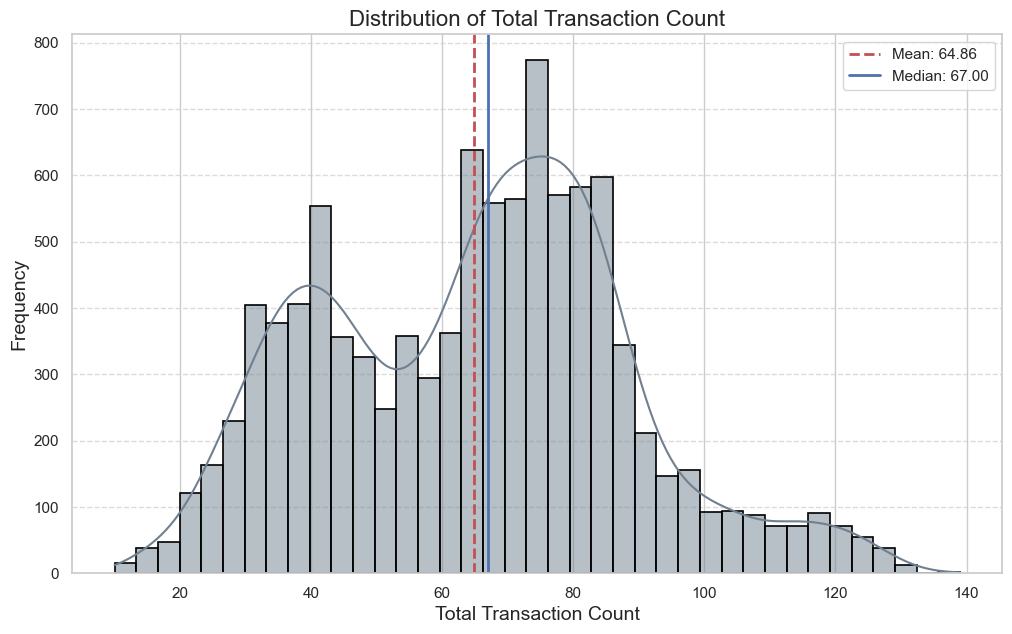

In [18]:
plt.figure(figsize=(12, 7))
sns.histplot(data['Total_Trans_Ct'], kde=True, color="slategray", edgecolor='black', linewidth=1.2)
plt.title('Distribution of Total Transaction Count', fontsize=16)
plt.xlabel('Total Transaction Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

mean_val = data['Total_Trans_Ct'].mean()
median_val = data['Total_Trans_Ct'].median()
plt.axvline(mean_val, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='b', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

plt.legend()
plt.show()


Observations:
- Distribution Shape: The distribution of 'Total_Trans_Ct' (Total Transaction Count) shows a somewhat bimodal shape, with two peaks indicating common transaction count ranges among customers.
- Central Tendency: The mean and median are closely aligned, as indicated by the red and blue lines. This alignment suggests a balanced distribution around the central values.
- Range and Spread: The range of transaction counts is broad, indicating varied transaction behaviors among customers.
- Outliers: The distribution does not show significant outliers, as most values are within a reasonable range of transaction counts.
- Overall Interpretation: The bimodal nature suggests two distinct groups of customers based on transaction frequency - one with a moderate number of transactions and another with a higher frequency. This might reflect different customer segments or usage patterns.


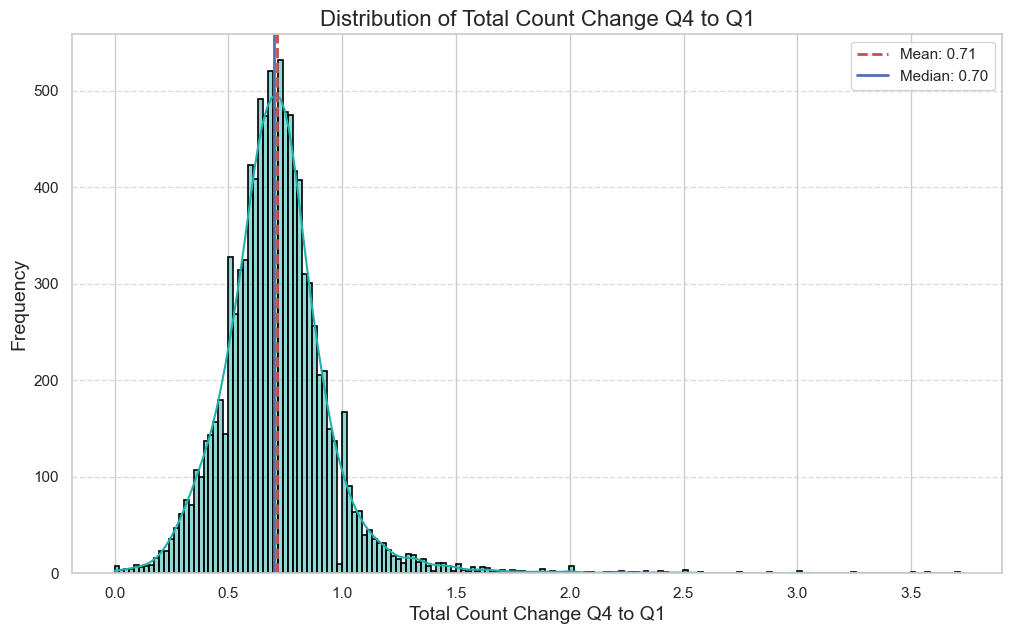

In [19]:
plt.figure(figsize=(12, 7))
sns.histplot(data['Total_Ct_Chng_Q4_Q1'], kde=True, color="lightseagreen", edgecolor='black', linewidth=1.2)
plt.title('Distribution of Total Count Change Q4 to Q1', fontsize=16)
plt.xlabel('Total Count Change Q4 to Q1', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

mean_val = data['Total_Ct_Chng_Q4_Q1'].mean()
median_val = data['Total_Ct_Chng_Q4_Q1'].median()
plt.axvline(mean_val, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='b', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

plt.legend()
plt.show()


Observations:
- Distribution Shape: The distribution of 'Total_Ct_Chng_Q4_Q1' (Total Count Change from Quarter 4 to Quarter 1) is right-skewed. Most customers have lower changes in their transaction counts.
- Central Tendency: The mean is slightly higher than the median, as shown by the red and blue lines. This difference is typical for right-skewed distributions and indicates the influence of higher values on the mean.
- Range and Spread: The range of change is wide, with some customers experiencing significant changes in their transaction counts between quarters.
- Outliers: The graph suggests the presence of outliers with very high count changes, potentially reflecting significant shifts in transaction behavior for a minority of customers.
- Overall Interpretation: The skewness indicates that while most customers do not experience major changes in transaction counts between quarters, a smaller group sees more significant fluctuations. This could be due to seasonal factors, lifestyle changes, or changes in financial behavior.

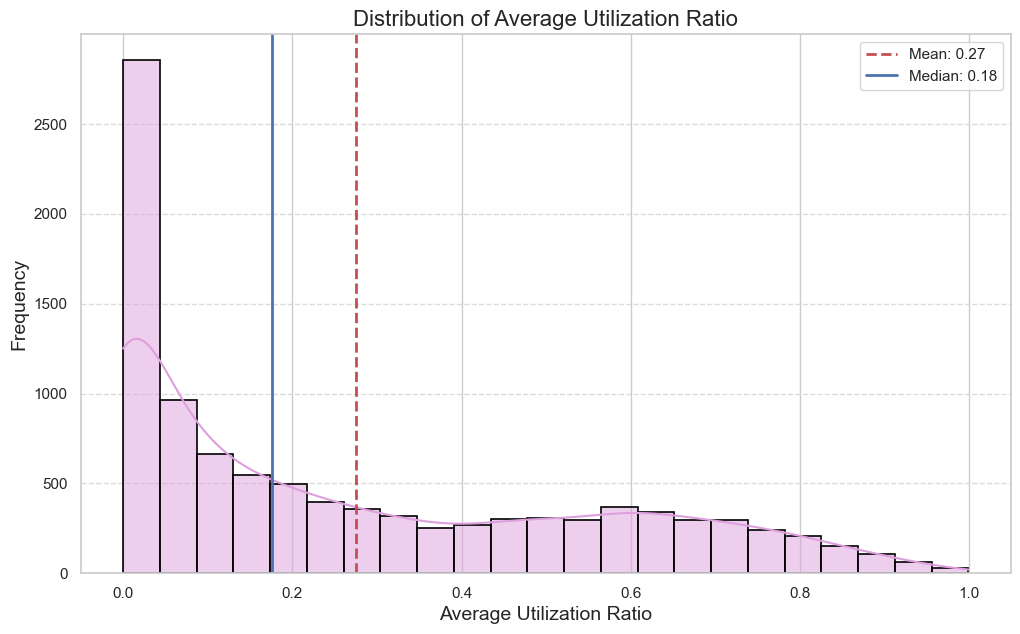

In [20]:
plt.figure(figsize=(12, 7))
sns.histplot(data['Avg_Utilization_Ratio'], kde=True, color="plum", edgecolor='black', linewidth=1.2)
plt.title('Distribution of Average Utilization Ratio', fontsize=16)
plt.xlabel('Average Utilization Ratio', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

mean_val = data['Avg_Utilization_Ratio'].mean()
median_val = data['Avg_Utilization_Ratio'].median()
plt.axvline(mean_val, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='b', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

plt.legend()
plt.show()


Observations:
- Distribution Shape: The distribution of 'Avg_Utilization_Ratio' is somewhat bimodal, with peaks at lower and higher utilization ratios.
- Central Tendency: The mean and median are indicated by the red and blue lines. The presence of two peaks affects these measures, suggesting diverse utilization patterns among customers.
- Range and Spread: The utilization ratio ranges from 0 to just under 1.0, indicating varying levels of credit utilization among customers.
- Outliers: The distribution does not show significant outliers, as most values are within a typical range for utilization ratios.
- Overall Interpretation: The bimodal distribution suggests two distinct groups of customers - one with low utilization and another with higher utilization. This might reflect different financial behaviors, such as customers who regularly use and pay off their credit versus those who maintain higher ongoing balances.

### Univariate analysis (Categorical columns)

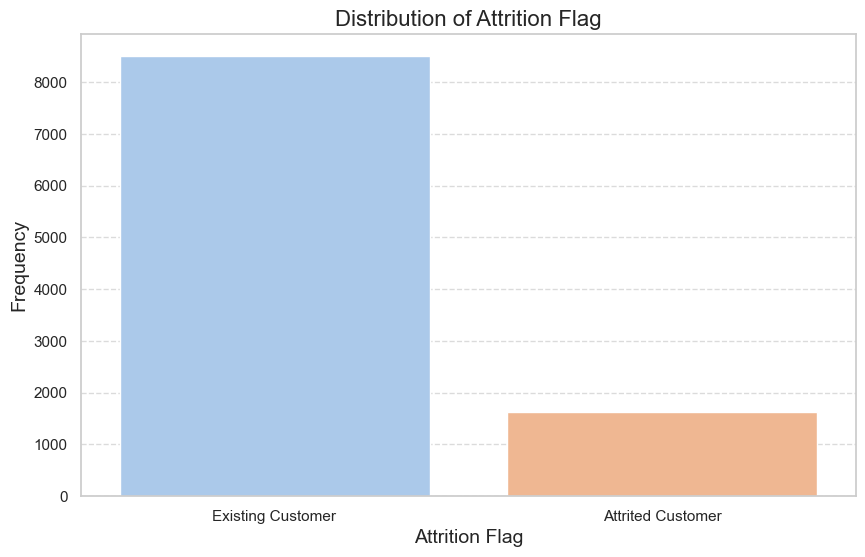

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Attrition_Flag', data=data, palette="pastel")
plt.title('Distribution of Attrition Flag', fontsize=16)
plt.xlabel('Attrition Flag', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Observations:
- Distribution: The graph shows the distribution of customers by their attrition status - either 'Existing Customer' or 'Attrited Customer'.
- Frequency: A significant majority of customers are classified as 'Existing Customers', indicating a lower proportion of customer attrition.
- Imbalance: There is a noticeable imbalance between the two categories, with 'Existing Customers' vastly outnumbering 'Attrited Customers'.
- Implications for Analysis: This imbalance might affect certain types of analyses, especially predictive modeling, where techniques to address class imbalance may be necessary.
- Overall Interpretation: The distribution suggests that the bank has been successful in retaining most of its customers, but the presence of attrited customers indicates areas for potential improvement in customer retention strategies.

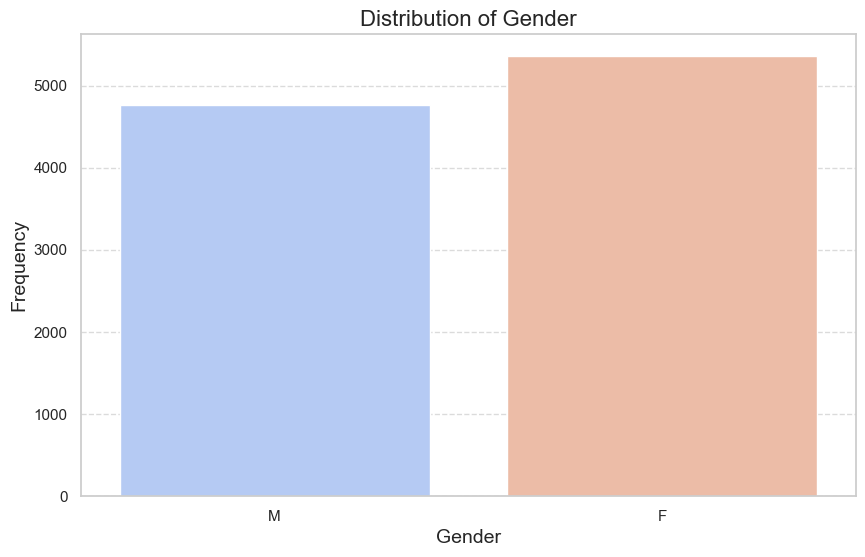

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=data, palette="coolwarm")
plt.title('Distribution of Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Observations:
- Distribution: The graph illustrates the gender distribution of customers, categorized as 'M' (Male) and 'F' (Female).
- Gender Ratio: There is a slight predominance of female customers compared to male customers in the dataset.
- Balance: While not perfectly balanced, the gender distribution is relatively even, indicating a diverse customer base in terms of gender.
- Implications for Analysis: The relatively balanced gender distribution is beneficial for analyses that might be sensitive to gender proportions, such as customer behavior studies or targeted marketing strategies.
- Overall Interpretation: The distribution suggests that the bank’s customer base is quite diverse in terms of gender, which might reflect the bank's broad appeal across different gender demographics.

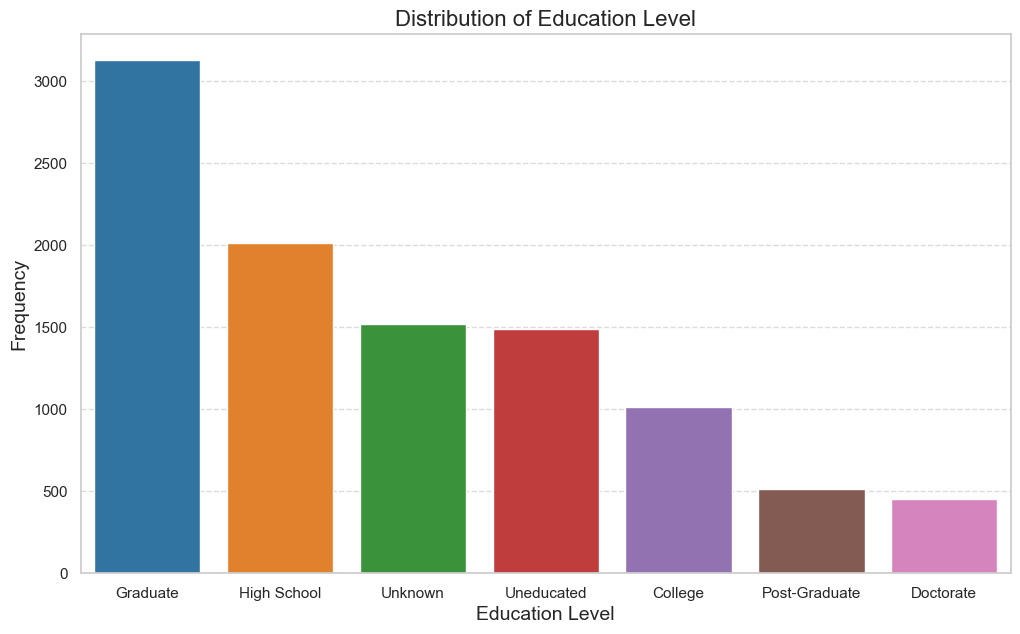

In [23]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Education_Level', data=data, order = data['Education_Level'].value_counts().index, palette="tab10")
plt.title('Distribution of Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

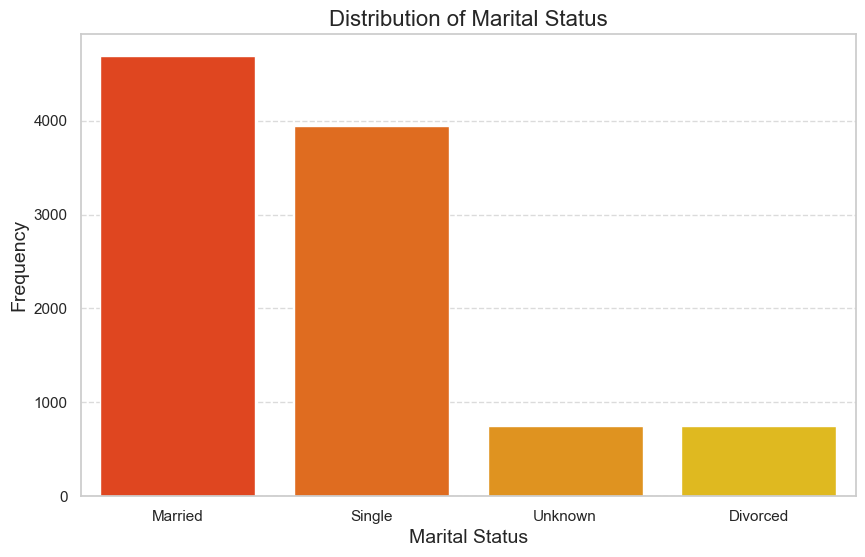

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', data=data, palette="autumn")
plt.title('Distribution of Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

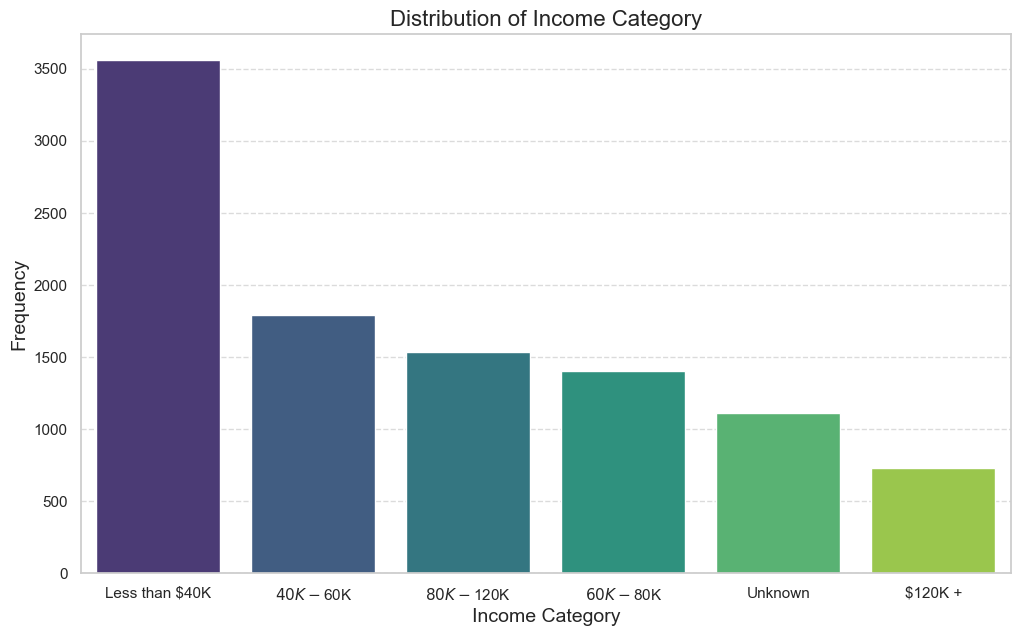

In [25]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Income_Category', data=data, order = data['Income_Category'].value_counts().index, palette="viridis")
plt.title('Distribution of Income Category', fontsize=16)
plt.xlabel('Income Category', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

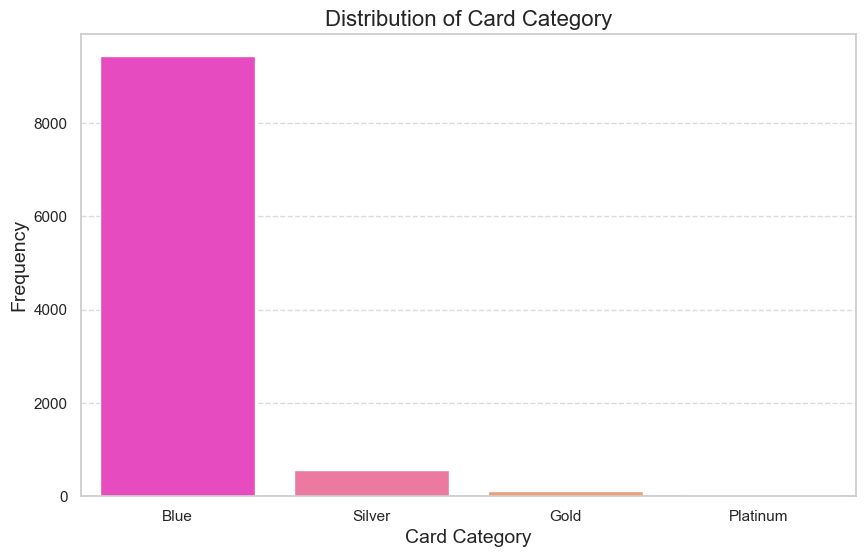

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Card_Category', data=data, order = data['Card_Category'].value_counts().index, palette="spring")
plt.title('Distribution of Card Category', fontsize=16)
plt.xlabel('Card Category', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Observations:
- Distribution: The graph illustrates the distribution of customers across different card categories - 'Blue', 'Silver', 'Gold', and 'Platinum'.
- Dominance of Blue Category: A vast majority of customers possess the 'Blue' category card, indicating it's the most common and possibly the standard card offering.
- Limited Higher Tier Cards: The 'Silver', 'Gold', and 'Platinum' categories have significantly fewer customers, suggesting these are premium offerings that cater to a smaller segment of the customer base.
- Implications for Analysis: This distribution can be relevant for understanding the bank's product segmentation and customer preferences for different levels of banking services.
- Overall Interpretation: The overwhelming preference for the 'Blue' card category might reflect the bank’s positioning or customer demographics, with a focus on mass-market products.

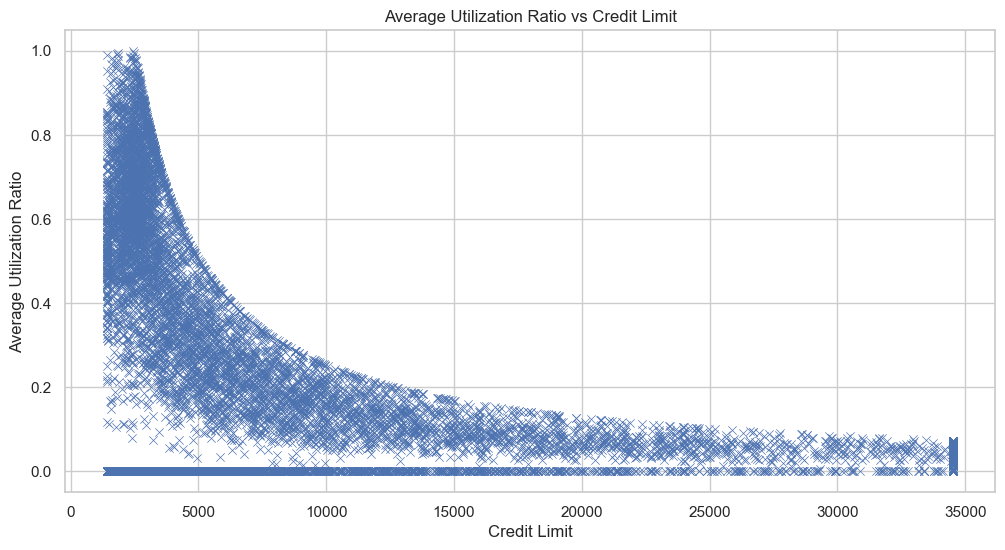

In [63]:
##Bi Variate Analysis

# Creating a scatter plot for Avg Utilization Ratio vs Credit Limit
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Credit_Limit', y='Avg_Utilization_Ratio', data=data, marker='x')
plt.title('Average Utilization Ratio vs Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Average Utilization Ratio')
plt.show()

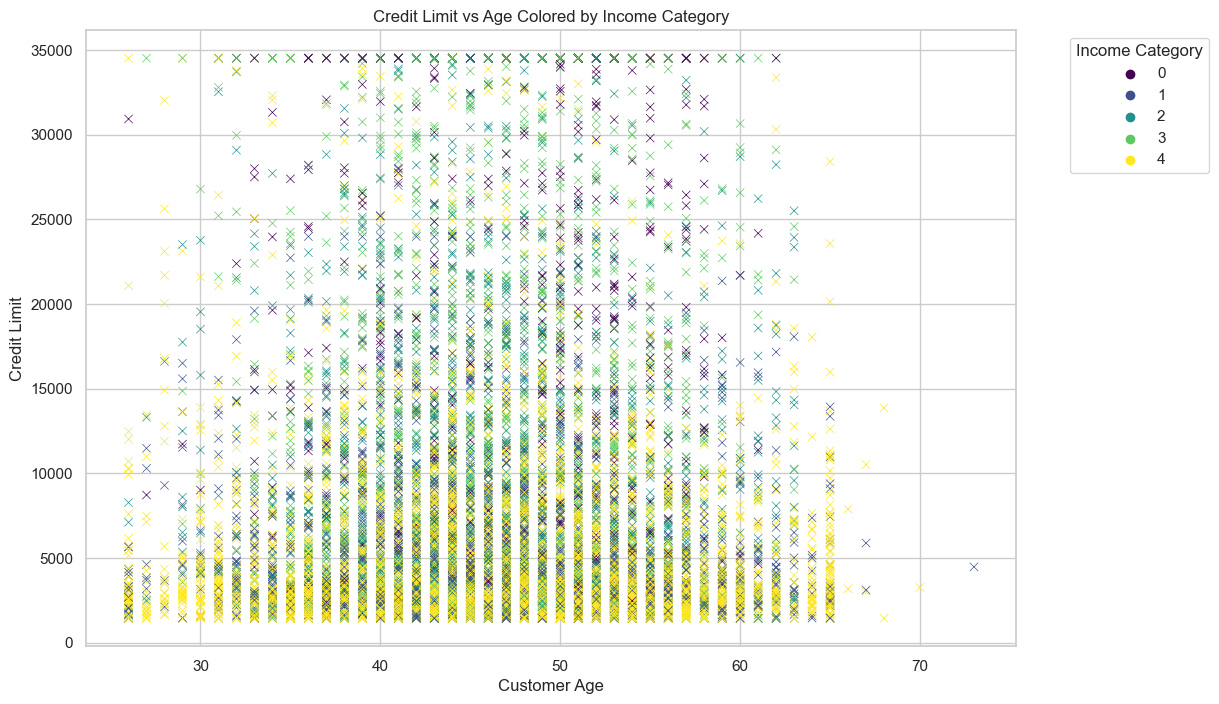

In [64]:
# Creating a scatter plot for Credit Limit vs Age, colored by Income Category
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Customer_Age', y='Credit_Limit', hue='Income_Category', data=data, palette='viridis', marker='x')
plt.title('Credit Limit vs Age Colored by Income Category')
plt.xlabel('Customer Age')
plt.ylabel('Credit Limit')
plt.legend(title='Income Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Question 1


## Is there a discernible pattern where clients in higher income categories exhibit a lower attrition rate, and if so, what strategies can be formulated to enhance client retention among those in lower income categories? 


### Attrition Rate = Attrition Customer /  ( Existing Customer + Attrition Customer )



In [62]:
income_attrition = data.groupby(['Income_Category', 'Attrition_Flag']).size().unstack()

income_attrition['Attrition Rate'] = income_attrition['Attrited Customer'] / (income_attrition['Existing Customer'] + income_attrition['Attrited Customer'])
income_attrition = income_attrition.sort_values(by='Attrition Rate', ascending=False)

income_attrition

Attrition_Flag,Attrited Customer,Existing Customer,Attrition Rate
Income_Category,,,
0,126,601,0.173315
4,799,3874,0.170982
3,242,1293,0.157655
1,271,1519,0.151397
2,189,1213,0.134807


## Question 2 

## Does the variable Total Relationship Count hold relevance in our analysis of customer attrition?

In [67]:
# Separating 'Total_Relationship_Count' data for the two groups
existing_customers_rel = data[data['Attrition_Flag'] == 'Existing Customer']['Total_Relationship_Count']
attrited_customers_rel = data[data['Attrition_Flag'] == 'Attrited Customer']['Total_Relationship_Count']

# Performing independent t-test
t_stat_rel, p_value_rel = ttest_ind(existing_customers_rel, attrited_customers_rel, equal_var=False)  # Assuming unequal variances

print(f"t-statistic for Total_Relationship_Count: {t_stat_rel}")
print(f"P-value for Total_Relationship_Count: {p_value_rel}")

t-statistic for Total_Relationship_Count: 14.944451354287043
P-value for Total_Relationship_Count: 3.225023329499345e-48


In [69]:
# Creating a contingency table
contingency_table_rel = pd.crosstab(data['Total_Relationship_Count'], data['Attrition_Flag'])

# Chi-Square test
chi2_rel, p_value_rel, _, _ = chi2_contingency(contingency_table_rel)
print(f"Chi-Square Statistic for Total_Relationship_Count: {chi2_rel}")
print(f"P-value for Total_Relationship_Count: {p_value_rel}")

Chi-Square Statistic for Total_Relationship_Count: 284.0675122272908
P-value for Total_Relationship_Count: 2.6610499913717976e-59


## Question 3 

## Is there a measurable trend that shows how Months on book affects customer attrition over time, perhaps by analyzing attrition rates in different periods?

In [70]:
existing_customers = data[data['Attrition_Flag'] == 'Existing Customer']['Months_on_book']
attrited_customers = data[data['Attrition_Flag'] == 'Attrited Customer']['Months_on_book']

t_stat, p_value = ttest_ind(existing_customers, attrited_customers, equal_var=False)

print(f"t-statistic: {t_stat}")
print(f"P-value: {p_value}")

t-statistic: -1.4042246373276999
P-value: 0.16038505264259176


## Question 4 

## Is there a significant difference in the average credit utilization ratios (Avg_Utilization_Ratio) between male and female credit card holders?


In [71]:
male_data = data[data['Gender'] == 'M']['Avg_Utilization_Ratio']
female_data = data[data['Gender'] == 'F']['Avg_Utilization_Ratio']

t_stat, p_value = ttest_ind(male_data, female_data)

t_stat, p_value

(-26.85380811729272, 1.6653873266473568e-153)

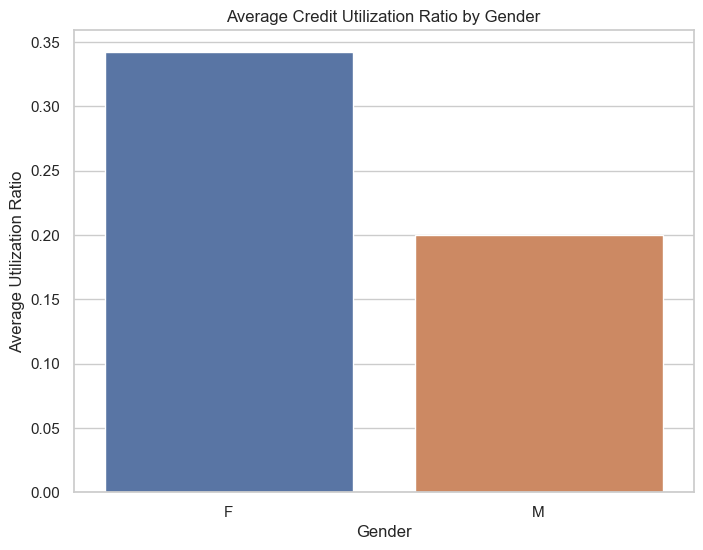

In [72]:
# Creating a bar plot for Average Utilization Ratio by Gender
avg_utilization_by_gender = data.groupby('Gender')['Avg_Utilization_Ratio'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Avg_Utilization_Ratio', data=avg_utilization_by_gender)
plt.title('Average Credit Utilization Ratio by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Utilization Ratio')
plt.show()

## Question 5

## Can we predict the likelihood of a customer leaving the bank based on their past transaction behavior and demographic information?

### Data Preprocessing

In [28]:
detailed_data_types = data.dtypes

missing_values = data.isnull().sum()
placeholder_check = data.apply(lambda x: x.isin(['Unknown', 'NA', 'N/A', '?', '-']).sum())
detailed_missing_placeholder_report = pd.DataFrame({
    'Data Types': detailed_data_types,
    'Missing Values': missing_values,
    'Placeholders': placeholder_check
})

detailed_missing_placeholder_report


,Data Types,Missing Values,Placeholders
CLIENTNUM,int64,0,0
Attrition_Flag,object,0,0
Customer_Age,int64,0,0
Gender,object,0,0
Dependent_count,int64,0,0
Education_Level,object,0,1519
Marital_Status,object,0,749
Income_Category,object,0,1112
Card_Category,object,0,0
Months_on_book,int64,0,0


The dataset does not contain any missing values, but there are placeholders marked as 'Unknown' in several categorical columns:

- Education_Level: 1,519 instances marked as 'Unknown'.
- Marital_Status: 749 instances marked as 'Unknown'.
- Income_Category: 1,112 instances marked as 'Unknown'.

Handling these 'Unknown' placeholders is important because they might affect the analysis and modeling. There are several strategies we can use:

- Imputation with mode: Replace 'Unknown' with the most frequent category, a central tendency measure, or predict these values using other variables in the dataset.
- model imputation: Treat 'Unknown' as a separate category. This approach is useful if the 'Unknown' values may have a distinct pattern or significance.
- Exclusion: Exclude these records from the analysis. This approach is less ideal as it reduces the dataset size and might introduce bias.

since we have less data, we are not employing the exclusion method, and we tried model imputation using Decision tree and results are very poor.


so, we'll replace the 'Unknown' placeholders with the most frequent category in each respective column. This approach is practical and commonly used.

In [29]:
columns_to_impute = ['Education_Level', 'Marital_Status', 'Income_Category']
for column in columns_to_impute:
    most_frequent_category = data[column].value_counts().idxmax()
    data[column].replace('Unknown', most_frequent_category, inplace=True)
imputation_check = data[columns_to_impute].apply(lambda x: (x == 'Unknown').sum())

imputation_check

Education_Level    0
Marital_Status     0
Income_Category    0
dtype: int64

In [30]:
mode_values = {col: data[col].mode()[0] for col in columns_to_impute}
mode_values

{'Education_Level': 'Graduate',
 'Marital_Status': 'Married',
 'Income_Category': 'Less than $40K'}

In [31]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [32]:
data = data.drop('CLIENTNUM', axis=1)

In [33]:
one_hot_encoder = OneHotEncoder(sparse=False)
nominal_columns = ['Gender', 'Marital_Status', 'Card_Category']
one_hot_encoded_data = one_hot_encoder.fit_transform(data[nominal_columns])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_data, columns=one_hot_encoder.get_feature_names_out(nominal_columns))
label_encoder = LabelEncoder()
ordinal_columns = ['Education_Level', 'Income_Category']
for column in ordinal_columns:
    data[column] = label_encoder.fit_transform(data[column])

data_encoded = data.drop(nominal_columns, axis=1)
data_encoded = pd.concat([data_encoded, one_hot_encoded_df], axis=1)

data_encoded.head()


/Users/kusumsaichowdary/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,Existing Customer,45,3,3,2,39,5,1,3,12691.0,...,0.061,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,Existing Customer,49,5,2,4,44,6,1,2,8256.0,...,0.105,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,Existing Customer,51,3,2,3,36,4,1,0,3418.0,...,0.000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,Existing Customer,40,4,3,4,34,3,4,1,3313.0,...,0.760,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,Existing Customer,40,3,5,2,21,5,1,0,4716.0,...,0.000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [34]:
label_encoder = LabelEncoder()
data_encoded['Attrition_Flag'] = label_encoder.fit_transform(data_encoded['Attrition_Flag'])

X = data_encoded.drop('Attrition_Flag', axis=1)
y = data_encoded['Attrition_Flag']

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


In [35]:
class_distribution= pd.Series(y_resampled).value_counts()
class_distribution

1    8500
0    8500
Name: Attrition_Flag, dtype: int64

In [36]:
print("Resampled dataset shape:", X_resampled.shape)


Resampled dataset shape: (17000, 25)


In [37]:
y_resampled.shape

(17000,)

In [38]:
data_after_smote = pd.concat([X_resampled, y_resampled], axis=1)

In [39]:
data_after_smote.head()

,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Attrition_Flag
0,45,3,3,2,39,5,1,3,12691.0,777,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
1,49,5,2,4,44,6,1,2,8256.0,864,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
2,51,3,2,3,36,4,1,0,3418.0,0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
3,40,4,3,4,34,3,4,1,3313.0,2517,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
4,40,3,5,2,21,5,1,0,4716.0,0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1


Feature: Customer_Age, Score: 0.02029
Feature: Dependent_count, Score: 0.00734
Feature: Education_Level, Score: 0.00735
Feature: Income_Category, Score: 0.00686
Feature: Months_on_book, Score: 0.01367
Feature: Total_Relationship_Count, Score: 0.05556
Feature: Months_Inactive_12_mon, Score: 0.01469
Feature: Contacts_Count_12_mon, Score: 0.01046
Feature: Credit_Limit, Score: 0.02233
Feature: Total_Revolving_Bal, Score: 0.10183
Feature: Avg_Open_To_Buy, Score: 0.02272
Feature: Total_Amt_Chng_Q4_Q1, Score: 0.05104
Feature: Total_Trans_Amt, Score: 0.22943
Feature: Total_Trans_Ct, Score: 0.18264
Feature: Total_Ct_Chng_Q4_Q1, Score: 0.08022
Feature: Avg_Utilization_Ratio, Score: 0.06031
Feature: Gender_F, Score: 0.02831
Feature: Gender_M, Score: 0.02883
Feature: Marital_Status_Divorced, Score: 0.00366
Feature: Marital_Status_Married, Score: 0.02613
Feature: Marital_Status_Single, Score: 0.01914
Feature: Card_Category_Blue, Score: 0.00316
Feature: Card_Category_Gold, Score: 0.00121
Feature: Ca

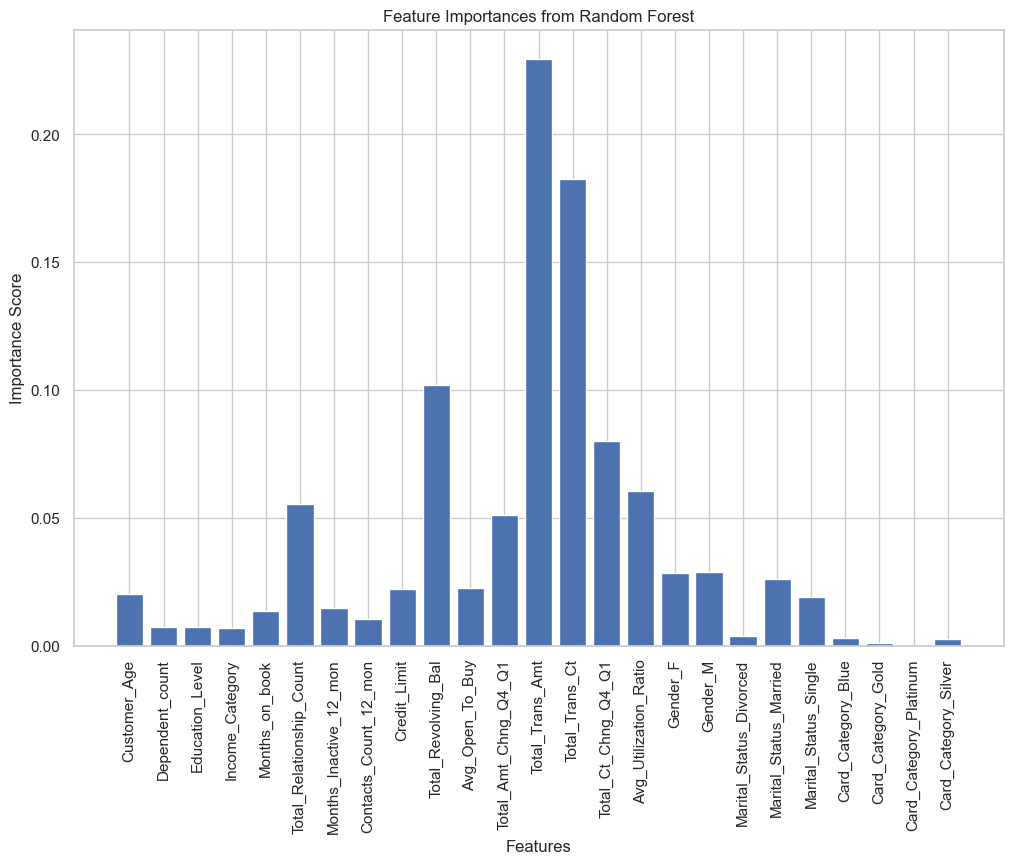

In [40]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

model = RandomForestClassifier()
model.fit(X_resampled, y_resampled)

importances = model.feature_importances_
feature_names = X_resampled.columns  # Getting the feature names

for i in range(len(importances)):
    print('Feature: %s, Score: %.5f' % (feature_names[i], importances[i]))

plt.figure(figsize=(12, 8)) 
plt.bar(feature_names, importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances from Random Forest')
plt.show()



In [41]:
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print("Sorted Feature Importances:")
print(feature_importances)


Sorted Feature Importances:
Total_Trans_Amt             0.229435
Total_Trans_Ct              0.182642
Total_Revolving_Bal         0.101825
Total_Ct_Chng_Q4_Q1         0.080220
Avg_Utilization_Ratio       0.060311
Total_Relationship_Count    0.055561
Total_Amt_Chng_Q4_Q1        0.051038
Gender_M                    0.028835
Gender_F                    0.028314
Marital_Status_Married      0.026132
Avg_Open_To_Buy             0.022724
Credit_Limit                0.022329
Customer_Age                0.020290
Marital_Status_Single       0.019143
Months_Inactive_12_mon      0.014693
Months_on_book              0.013666
Contacts_Count_12_mon       0.010459
Education_Level             0.007345
Dependent_count             0.007338
Income_Category             0.006855
Marital_Status_Divorced     0.003661
Card_Category_Blue          0.003156
Card_Category_Silver        0.002414
Card_Category_Gold          0.001209
Card_Category_Platinum      0.000404
dtype: float64


In [42]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter= 100)

rfe = RFE(estimator=model, n_features_to_select=10)  # Adjust the number of features as needed
rfe.fit(X_resampled, y_resampled)
feature_names = X_resampled.columns

print("RFE Feature Selection:")
for i in range(len(rfe.support_)):
    print('Feature: %s, Selected: %s, Rank: %d' % (feature_names[i], rfe.support_[i], rfe.ranking_[i]))


/Users/kusumsaichowdary/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kusumsaichowdary/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

RFE Feature Selection:
Feature: Customer_Age, Selected: False, Rank: 6
Feature: Dependent_count, Selected: False, Rank: 5
Feature: Education_Level, Selected: False, Rank: 9
Feature: Income_Category, Selected: False, Rank: 4
Feature: Months_on_book, Selected: False, Rank: 13
Feature: Total_Relationship_Count, Selected: True, Rank: 1
Feature: Months_Inactive_12_mon, Selected: True, Rank: 1
Feature: Contacts_Count_12_mon, Selected: True, Rank: 1
Feature: Credit_Limit, Selected: True, Rank: 1
Feature: Total_Revolving_Bal, Selected: True, Rank: 1
Feature: Avg_Open_To_Buy, Selected: True, Rank: 1
Feature: Total_Amt_Chng_Q4_Q1, Selected: False, Rank: 7
Feature: Total_Trans_Amt, Selected: False, Rank: 16
Feature: Total_Trans_Ct, Selected: True, Rank: 1
Feature: Total_Ct_Chng_Q4_Q1, Selected: False, Rank: 3
Feature: Avg_Utilization_Ratio, Selected: False, Rank: 15
Feature: Gender_F, Selected: True, Rank: 1
Feature: Gender_M, Selected: False, Rank: 2
Feature: Marital_Status_Divorced, Selected: F

In [43]:
rfe_results = pd.DataFrame({'Feature': feature_names, 'Selected': rfe.support_, 'Rank': rfe.ranking_})
rfe_results_sorted = rfe_results.sort_values(by='Rank')
print(rfe_results_sorted)

                     Feature  Selected  Rank
8               Credit_Limit      True     1
13            Total_Trans_Ct      True     1
20     Marital_Status_Single      True     1
10           Avg_Open_To_Buy      True     1
21        Card_Category_Blue      True     1
5   Total_Relationship_Count      True     1
6     Months_Inactive_12_mon      True     1
7      Contacts_Count_12_mon      True     1
16                  Gender_F      True     1
9        Total_Revolving_Bal      True     1
17                  Gender_M     False     2
14       Total_Ct_Chng_Q4_Q1     False     3
3            Income_Category     False     4
1            Dependent_count     False     5
0               Customer_Age     False     6
11      Total_Amt_Chng_Q4_Q1     False     7
18   Marital_Status_Divorced     False     8
2            Education_Level     False     9
24      Card_Category_Silver     False    10
19    Marital_Status_Married     False    11
22        Card_Category_Gold     False    12
4         

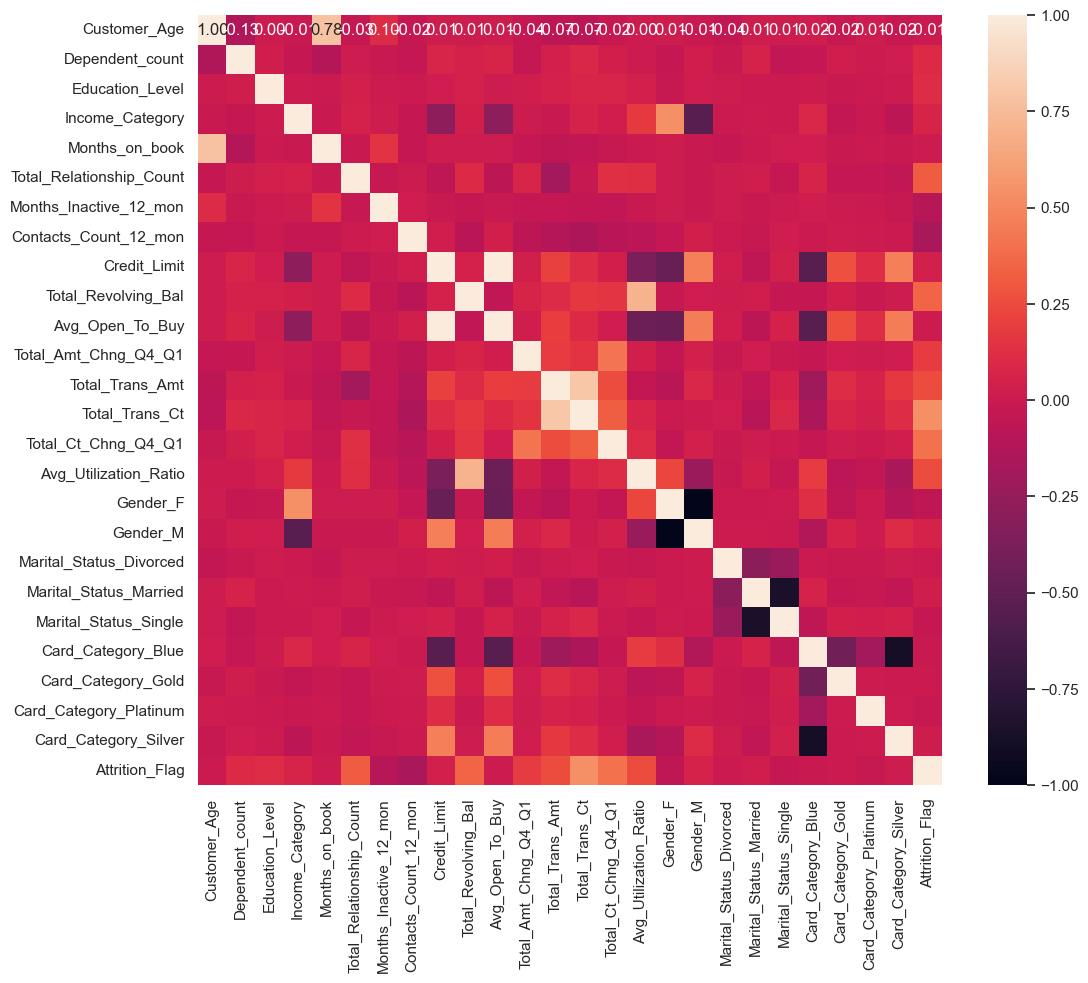

Attrition_Flag              1.000000
Total_Trans_Ct              0.534233
Total_Ct_Chng_Q4_Q1         0.399157
Total_Revolving_Bal         0.346846
Total_Relationship_Count    0.317908
Avg_Utilization_Ratio       0.255172
Total_Trans_Amt             0.252281
Total_Amt_Chng_Q4_Q1        0.182645
Education_Level             0.115840
Dependent_count             0.095554
Income_Category             0.063496
Gender_M                    0.059888
Credit_Limit                0.040636
Marital_Status_Married      0.026190
Card_Category_Silver        0.015396
Avg_Open_To_Buy             0.006483
Months_on_book              0.000452
Marital_Status_Divorced    -0.002381
Card_Category_Gold         -0.005208
Customer_Age               -0.005380
Card_Category_Blue         -0.008419
Card_Category_Platinum     -0.016214
Marital_Status_Single      -0.025442
Gender_F                   -0.059888
Months_Inactive_12_mon     -0.100572
Contacts_Count_12_mon      -0.168611
Name: Attrition_Flag, dtype: float64


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data_after_smote.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()
print(corr_matrix['Attrition_Flag'].sort_values(ascending=False))


### Set 1: Mutual Features Across All Three Methods
This set includes features that were identified as important by all three methods: Random Forest feature importance, Recursive Feature Elimination (RFE), and Correlation Analysis.

##### Mutual Features:

- Total_Revolving_Bal
- Total_Ct_Chng_Q4_Q1
- Total_Relationship_Count

### Set 2: All Important Features
This set includes all features identified as important by at least one of the three methods.

##### All Important Features:

- Total_Trans_Ct
- Total_Revolving_Bal
- Total_Ct_Chng_Q4_Q1
- Total_Relationship_Count
- Avg_Utilization_Ratio
- Total_Amt_Chng_Q4_Q1
- Credit_Limit
- Gender_F
- Income_Category
- Card_Category_Blue
- Avg_Open_To_Buy
- Months_Inactive_12_mon
- Contacts_Count_12_mon
- Total_Trans_Amt

In [45]:
data_after_smote.to_csv('/Users/kusumsaichowdary/Downloads/newbankdataM.csv', index=False)


In [46]:
dataModellling = pd.read_csv('/Users/kusumsaichowdary/Downloads/newbankdataM.csv')

dataModellling.head()

,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Attrition_Flag
0,45,3,3,2,39,5,1,3,12691.0,777,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
1,49,5,2,4,44,6,1,2,8256.0,864,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
2,51,3,2,3,36,4,1,0,3418.0,0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
3,40,4,3,4,34,3,4,1,3313.0,2517,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
4,40,3,5,2,21,5,1,0,4716.0,0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1


In [47]:
set1_features = ['Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 'Total_Relationship_Count']
set2_features = ['Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 
                 'Total_Relationship_Count', 'Avg_Utilization_Ratio', 'Total_Amt_Chng_Q4_Q1', 
                 'Credit_Limit', 'Gender_F', 'Income_Category', 'Card_Category_Blue', 
                 'Avg_Open_To_Buy', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Trans_Amt']

target = 'Attrition_Flag'

set1_data = dataModellling[set1_features + [target]]
set2_data = dataModellling[set2_features + [target]]

set1_data.head(), set2_data.head()


(   Total_Revolving_Bal  Total_Ct_Chng_Q4_Q1  Total_Relationship_Count  \
 0                  777                1.625                         5   
 1                  864                3.714                         6   
 2                    0                2.333                         4   
 3                 2517                2.333                         3   
 4                    0                2.500                         5   
 
    Attrition_Flag  
 0               1  
 1               1  
 2               1  
 3               1  
 4               1  ,
    Total_Trans_Ct  Total_Revolving_Bal  Total_Ct_Chng_Q4_Q1  \
 0              42                  777                1.625   
 1              33                  864                3.714   
 2              20                    0                2.333   
 3              20                 2517                2.333   
 4              28                    0                2.500   
 
    Total_Relationship_Count  Avg_Utiliza

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X1_train, X1_test, y1_train, y1_test = train_test_split(
    set1_data.drop(target, axis=1), set1_data[target], test_size=0.2, random_state=42)

X2_train, X2_test, y2_train, y2_test = train_test_split(
    set2_data.drop(target, axis=1), set2_data[target], test_size=0.2, random_state=42)

model1 = RandomForestClassifier(random_state=42)
model2 = RandomForestClassifier(random_state=42)

model1.fit(X1_train, y1_train)
model2.fit(X2_train, y2_train)

y1_pred = model1.predict(X1_test)
y2_pred = model2.predict(X2_test)

metrics1 = {
    'Accuracy': accuracy_score(y1_test, y1_pred),
    'Precision': precision_score(y1_test, y1_pred),
    'Recall': recall_score(y1_test, y1_pred),
    'F1 Score': f1_score(y1_test, y1_pred),
    'ROC AUC Score': roc_auc_score(y1_test, y1_pred)
}

metrics2 = {
    'Accuracy': accuracy_score(y2_test, y2_pred),
    'Precision': precision_score(y2_test, y2_pred),
    'Recall': recall_score(y2_test, y2_pred),
    'F1 Score': f1_score(y2_test, y2_pred),
    'ROC AUC Score': roc_auc_score(y2_test, y2_pred)
}

metrics1, metrics2


({'Accuracy': 0.7858823529411765,
  'Precision': 0.7627494456762749,
  'Recall': 0.8210023866348448,
  'F1 Score': 0.7908045977011494,
  'ROC AUC Score': 0.7863712629229909},
 {'Accuracy': 0.9779411764705882,
  'Precision': 0.987812309567337,
  'Recall': 0.9671837708830548,
  'F1 Score': 0.9773892071148629,
  'ROC AUC Score': 0.9777914214044044})

### Analysis
- The model using Set 2 features significantly outperforms the model using Set 1 features across all metrics. This indicates that the broader feature set captures more nuances and patterns in the data, leading to better predictions of customer churn.
- The high precision and recall for the Set 2 model suggest it is highly effective at identifying true cases of churn and minimizing false positives.
- The ROC AUC Score, a measure of a model's ability to distinguish between classes, is also considerably higher for the Set 2 model, reinforcing its superior performance.

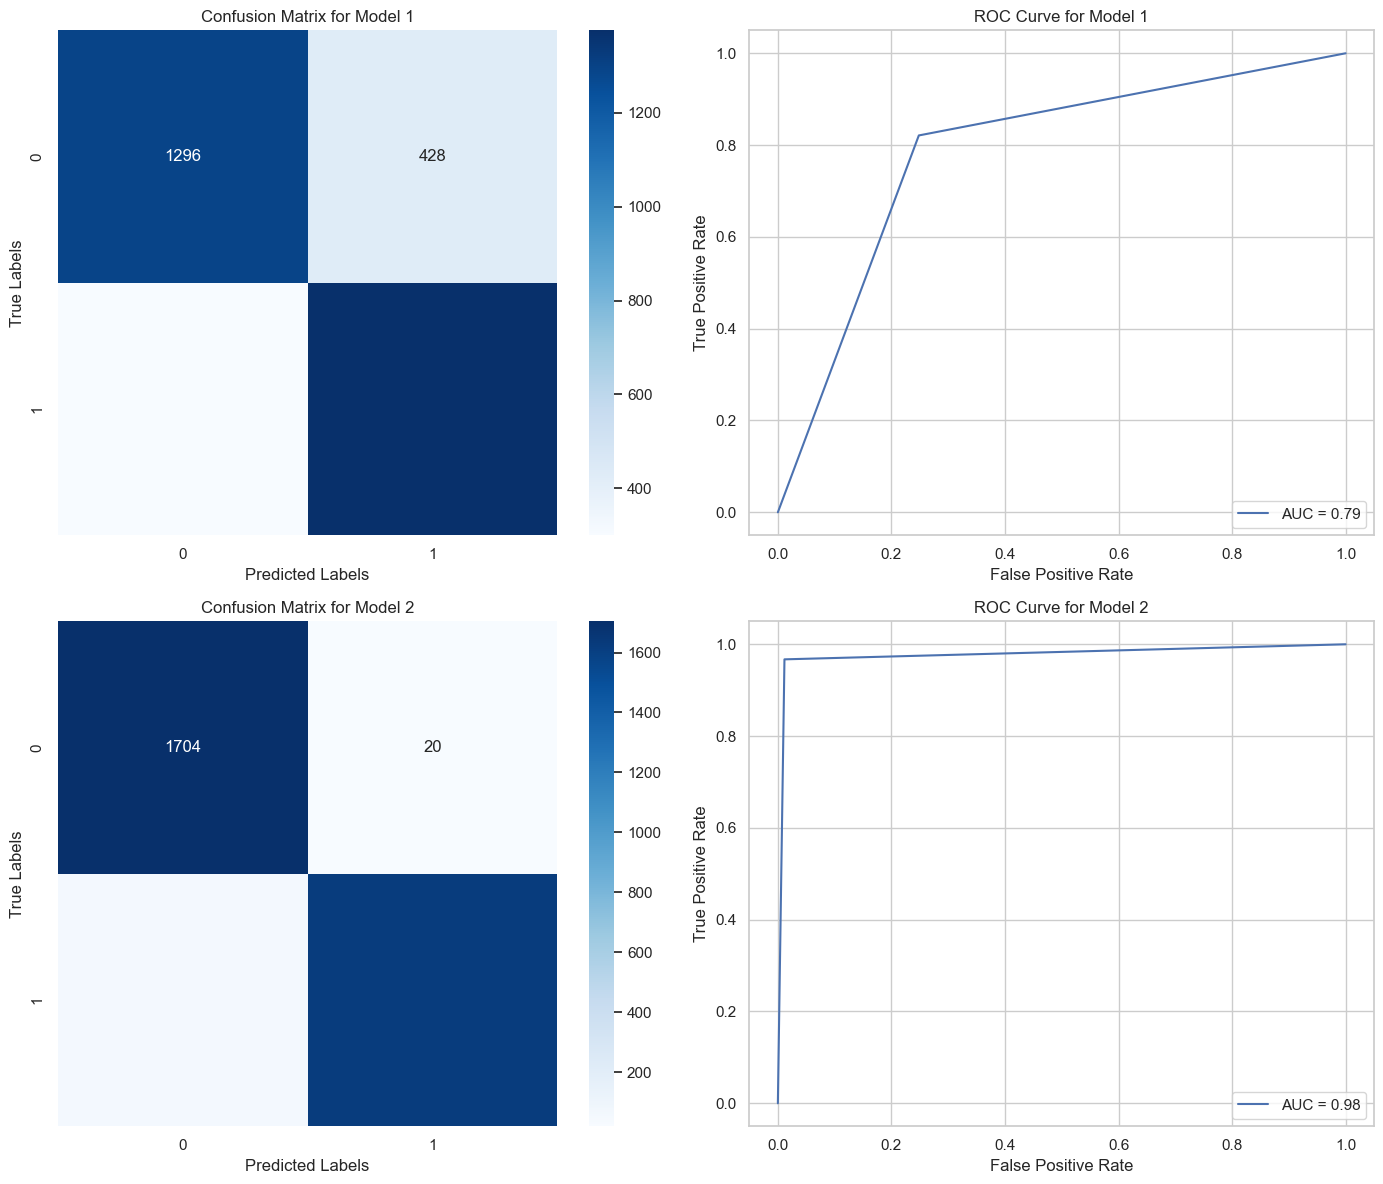

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay

conf_matrix1 = confusion_matrix(y1_test, y1_pred)
fpr1, tpr1, thresholds1 = roc_curve(y1_test, y1_pred)
roc_auc1 = auc(fpr1, tpr1)

conf_matrix2 = confusion_matrix(y2_test, y2_pred)
fpr2, tpr2, thresholds2 = roc_curve(y2_test, y2_pred)
roc_auc2 = auc(fpr2, tpr2)

fig, ax = plt.subplots(2, 2, figsize=(14, 12))

sns.heatmap(conf_matrix1, annot=True, fmt="d", cmap="Blues", ax=ax[0, 0])
ax[0, 0].set_title('Confusion Matrix for Model 1')
ax[0, 0].set_xlabel('Predicted Labels')
ax[0, 0].set_ylabel('True Labels')

RocCurveDisplay(fpr=fpr1, tpr=tpr1, roc_auc=roc_auc1).plot(ax=ax[0, 1])
ax[0, 1].set_title('ROC Curve for Model 1')
ax[0, 1].set_xlabel('False Positive Rate')
ax[0, 1].set_ylabel('True Positive Rate')

sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Blues", ax=ax[1, 0])
ax[1, 0].set_title('Confusion Matrix for Model 2')
ax[1, 0].set_xlabel('Predicted Labels')
ax[1, 0].set_ylabel('True Labels')

RocCurveDisplay(fpr=fpr2, tpr=tpr2, roc_auc=roc_auc2).plot(ax=ax[1, 1])
ax[1, 1].set_title('ROC Curve for Model 2')
ax[1, 1].set_xlabel('False Positive Rate')
ax[1, 1].set_ylabel('True Positive Rate')

plt.tight_layout()
plt.show()


In [50]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model1 = GradientBoostingClassifier(random_state=42)
gb_model1.fit(X1_train, y1_train)
y1_gb_pred = gb_model1.predict(X1_test)

gb_model2 = GradientBoostingClassifier(random_state=42)
gb_model2.fit(X2_train, y2_train)
y2_gb_pred = gb_model2.predict(X2_test)

gb_metrics1 = {
    'Accuracy': accuracy_score(y1_test, y1_gb_pred),
    'Precision': precision_score(y1_test, y1_gb_pred),
    'Recall': recall_score(y1_test, y1_gb_pred),
    'F1 Score': f1_score(y1_test, y1_gb_pred),
    'ROC AUC Score': roc_auc_score(y1_test, y1_gb_pred)
}

gb_metrics2 = {
    'Accuracy': accuracy_score(y2_test, y2_gb_pred),
    'Precision': precision_score(y2_test, y2_gb_pred),
    'Recall': recall_score(y2_test, y2_gb_pred),
    'F1 Score': f1_score(y2_test, y2_gb_pred),
    'ROC AUC Score': roc_auc_score(y2_test, y2_gb_pred)
}

gb_metrics1, gb_metrics2


({'Accuracy': 0.8102941176470588,
  'Precision': 0.7910784867306606,
  'Recall': 0.8359188544152745,
  'F1 Score': 0.8128807658833769,
  'ROC AUC Score': 0.8106508425208623},
 {'Accuracy': 0.9647058823529412,
  'Precision': 0.9703748488512697,
  'Recall': 0.9576372315035799,
  'F1 Score': 0.9639639639639639,
  'ROC AUC Score': 0.9646074788608386})

### Analysis
- Similar to the Random Forest models, the Gradient Boosting models show better performance with the broader Set 2 features compared to Set 1.
- Both accuracy and the ROC AUC score are significantly higher with Set 2, indicating better overall performance and the model's ability to distinguish between classes.
- The F1 score, a balance between precision and recall, is also higher with Set 2, suggesting a better balance in correctly predicting churn and not misclassifying non-churn cases.

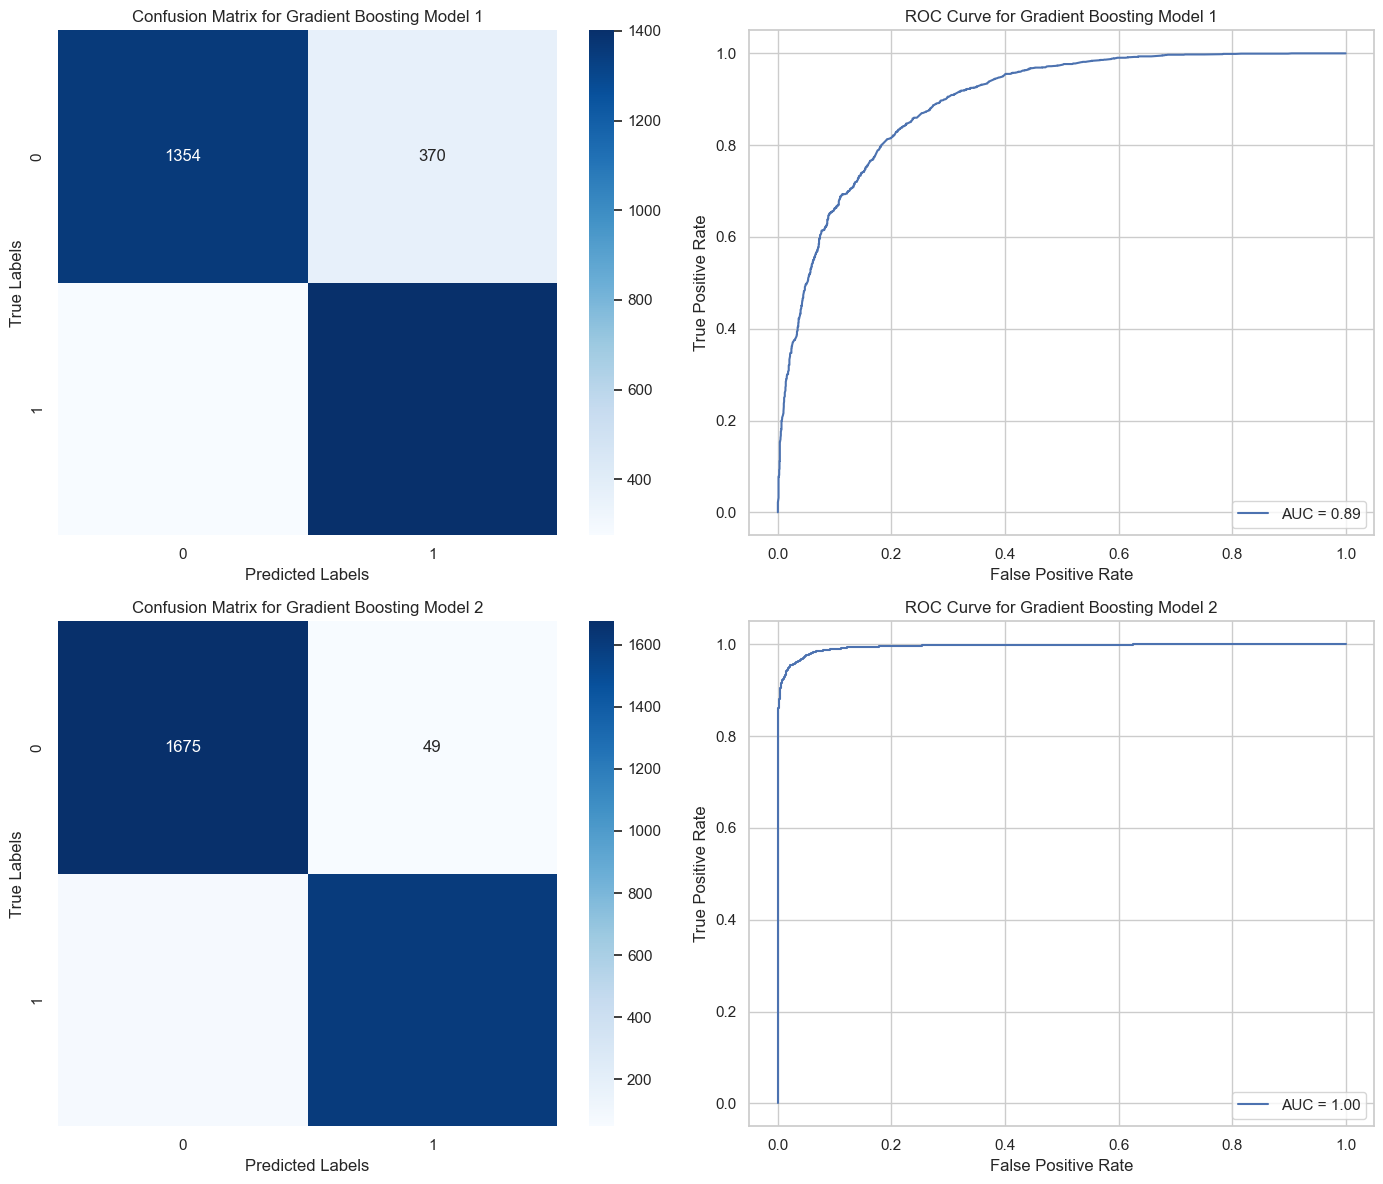

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay

y1_gb_pred_proba = gb_model1.predict_proba(X1_test)[:, 1]
y2_gb_pred_proba = gb_model2.predict_proba(X2_test)[:, 1]

conf_matrix_gb1 = confusion_matrix(y1_test, y1_gb_pred)
fpr_gb1, tpr_gb1, thresholds_gb1 = roc_curve(y1_test, y1_gb_pred_proba)
roc_auc_gb1 = auc(fpr_gb1, tpr_gb1)

conf_matrix_gb2 = confusion_matrix(y2_test, y2_gb_pred)
fpr_gb2, tpr_gb2, thresholds_gb2 = roc_curve(y2_test, y2_gb_pred_proba)
roc_auc_gb2 = auc(fpr_gb2, tpr_gb2)

fig, ax = plt.subplots(2, 2, figsize=(14, 12))

sns.heatmap(conf_matrix_gb1, annot=True, fmt="d", cmap="Blues", ax=ax[0, 0])
ax[0, 0].set_title('Confusion Matrix for Gradient Boosting Model 1')
ax[0, 0].set_xlabel('Predicted Labels')
ax[0, 0].set_ylabel('True Labels')

RocCurveDisplay(fpr=fpr_gb1, tpr=tpr_gb1, roc_auc=roc_auc_gb1).plot(ax=ax[0, 1])
ax[0, 1].set_title('ROC Curve for Gradient Boosting Model 1')
ax[0, 1].set_xlabel('False Positive Rate')
ax[0, 1].set_ylabel('True Positive Rate')

sns.heatmap(conf_matrix_gb2, annot=True, fmt="d", cmap="Blues", ax=ax[1, 0])
ax[1, 0].set_title('Confusion Matrix for Gradient Boosting Model 2')
ax[1, 0].set_xlabel('Predicted Labels')
ax[1, 0].set_ylabel('True Labels')

RocCurveDisplay(fpr=fpr_gb2, tpr=tpr_gb2, roc_auc=roc_auc_gb2).plot(ax=ax[1, 1])
ax[1, 1].set_title('ROC Curve for Gradient Boosting Model 2')
ax[1, 1].set_xlabel('False Positive Rate')
ax[1, 1].set_ylabel('True Positive Rate')

plt.tight_layout()
plt.show()


In [52]:
from xgboost import XGBClassifier

xgb_model1 = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model1.fit(X1_train, y1_train)
y1_xgb_pred = xgb_model1.predict(X1_test)

xgb_model2 = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model2.fit(X2_train, y2_train)
y2_xgb_pred = xgb_model2.predict(X2_test)

xgb_metrics1 = {
    'Accuracy': accuracy_score(y1_test, y1_xgb_pred),
    'Precision': precision_score(y1_test, y1_xgb_pred),
    'Recall': recall_score(y1_test, y1_xgb_pred),
    'F1 Score': f1_score(y1_test, y1_xgb_pred),
    'ROC AUC Score': roc_auc_score(y1_test, y1_xgb_pred)
}

xgb_metrics2 = {
    'Accuracy': accuracy_score(y2_test, y2_xgb_pred),
    'Precision': precision_score(y2_test, y2_xgb_pred),
    'Recall': recall_score(y2_test, y2_xgb_pred),
    'F1 Score': f1_score(y2_test, y2_xgb_pred),
    'ROC AUC Score': roc_auc_score(y2_test, y2_xgb_pred)
}

xgb_metrics1, xgb_metrics2


({'Accuracy': 0.8005882352941176,
  'Precision': 0.7887731481481481,
  'Recall': 0.8132458233890215,
  'F1 Score': 0.800822561692127,
  'ROC AUC Score': 0.8007644430170165},
 {'Accuracy': 0.9797058823529412,
  'Precision': 0.9884498480243161,
  'Recall': 0.9701670644391408,
  'F1 Score': 0.979223125564589,
  'ROC AUC Score': 0.9795730913843036})

### Analysis
- Similar to the previous models, the XGBoost model using Set 2 features outperforms the model using Set 1 features across all metrics. This indicates that the comprehensive feature set in Set 2 is more effective in capturing the nuances of customer churn.
- The high precision and recall of the Set 2 model suggest that it is excellent at correctly identifying true cases of churn and minimizing false positives.
- The ROC AUC Score, which is a measure of the model's ability to distinguish between the churn and non-churn classes, is notably high for the Set 2 model, indicating its strong performance.

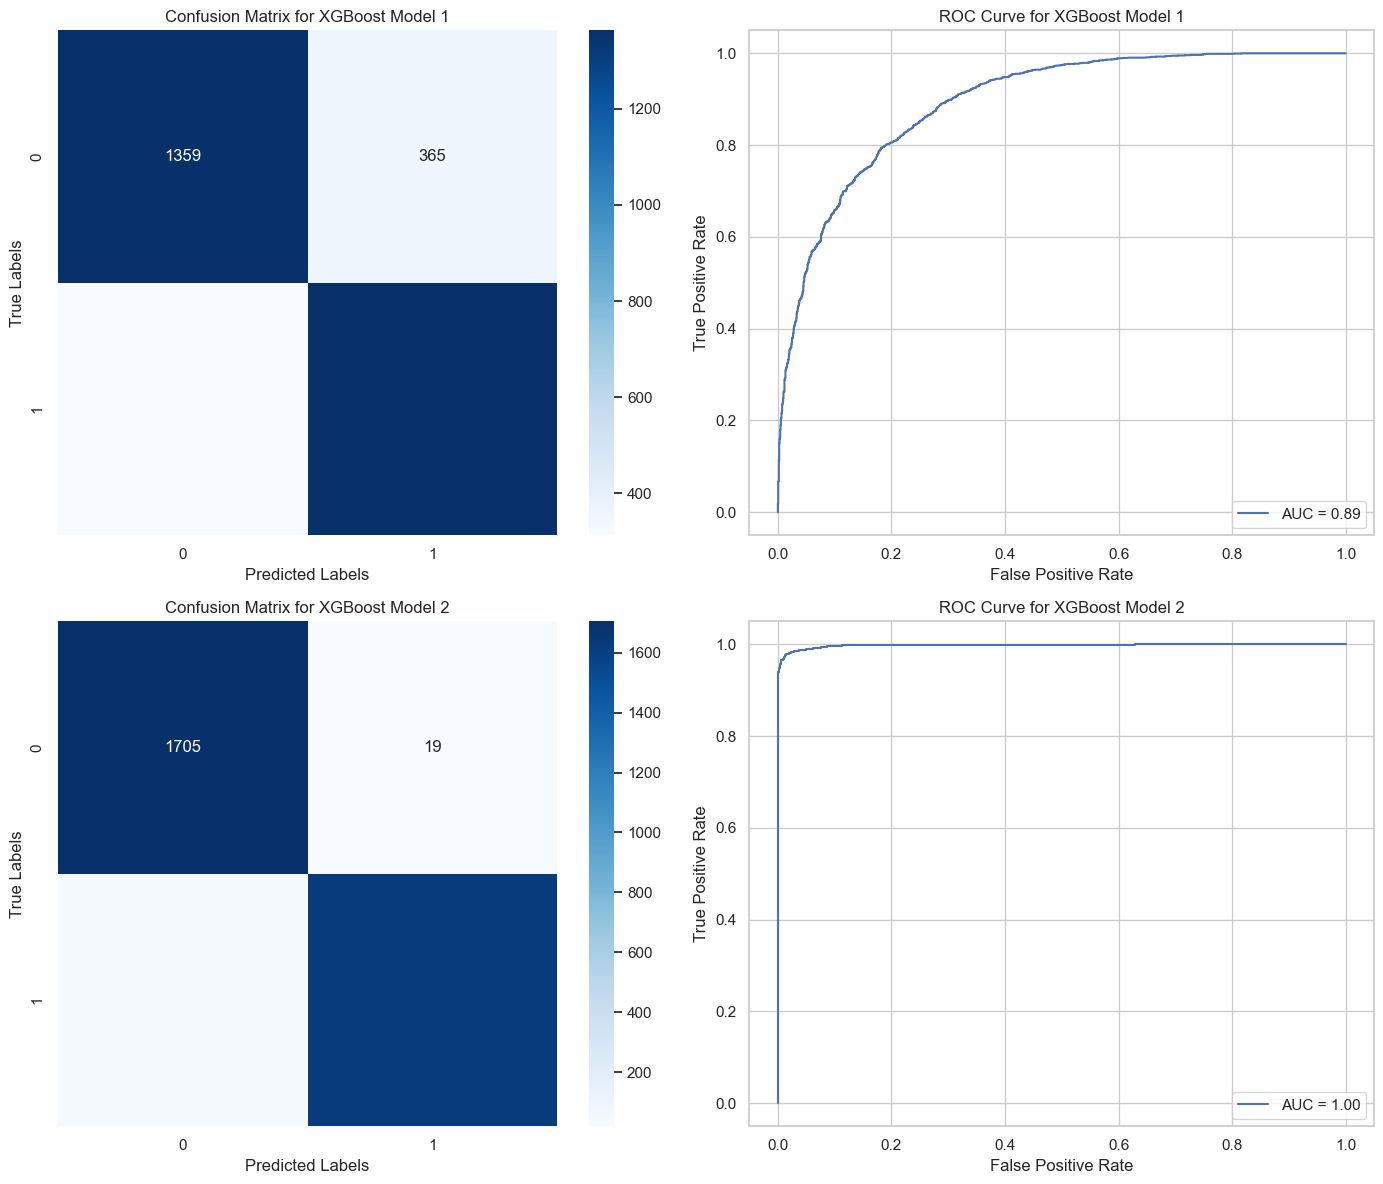

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay

y1_xgb_pred_proba = xgb_model1.predict_proba(X1_test)[:, 1]
y2_xgb_pred_proba = xgb_model2.predict_proba(X2_test)[:, 1]

conf_matrix_xgb1 = confusion_matrix(y1_test, y1_xgb_pred)
fpr_xgb1, tpr_xgb1, thresholds_xgb1 = roc_curve(y1_test, y1_xgb_pred_proba)
roc_auc_xgb1 = auc(fpr_xgb1, tpr_xgb1)

conf_matrix_xgb2 = confusion_matrix(y2_test, y2_xgb_pred)
fpr_xgb2, tpr_xgb2, thresholds_xgb2 = roc_curve(y2_test, y2_xgb_pred_proba)
roc_auc_xgb2 = auc(fpr_xgb2, tpr_xgb2)

fig, ax = plt.subplots(2, 2, figsize=(14, 12))

sns.heatmap(conf_matrix_xgb1, annot=True, fmt="d", cmap="Blues", ax=ax[0, 0])
ax[0, 0].set_title('Confusion Matrix for XGBoost Model 1')
ax[0, 0].set_xlabel('Predicted Labels')
ax[0, 0].set_ylabel('True Labels')

RocCurveDisplay(fpr=fpr_xgb1, tpr=tpr_xgb1, roc_auc=roc_auc_xgb1).plot(ax=ax[0, 1])
ax[0, 1].set_title('ROC Curve for XGBoost Model 1')
ax[0, 1].set_xlabel('False Positive Rate')
ax[0, 1].set_ylabel('True Positive Rate')

sns.heatmap(conf_matrix_xgb2, annot=True, fmt="d", cmap="Blues", ax=ax[1, 0])
ax[1, 0].set_title('Confusion Matrix for XGBoost Model 2')
ax[1, 0].set_xlabel('Predicted Labels')
ax[1, 0].set_ylabel('True Labels')

RocCurveDisplay(fpr=fpr_xgb2, tpr=tpr_xgb2, roc_auc=roc_auc_xgb2).plot(ax=ax[1, 1])
ax[1, 1].set_title('ROC Curve for XGBoost Model 2')
ax[1, 1].set_xlabel('False Positive Rate')
ax[1, 1].set_ylabel('True Positive Rate')

plt.tight_layout()
plt.show()


In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1],
    'min_child_weight': [1, 2, 3]
}

xgb_grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid,
    cv=3, 
    scoring='accuracy', 
    verbose=1, 
    n_jobs=-1 
)

xgb_grid_search.fit(X2_train, y2_train)

best_params = xgb_grid_search.best_params_
best_score = xgb_grid_search.best_score_

best_params, best_score


Fitting 3 folds for each of 243 candidates, totalling 729 fits


({'learning_rate': 0.2,
  'max_depth': 5,
  'min_child_weight': 1,
  'n_estimators': 150,
  'subsample': 0.9},
 0.9797796115746205)

In [55]:
optimal_params = {
    'learning_rate': 0.2,
    'max_depth': 7,
    'min_child_weight': 3,
    'n_estimators': 150,
    'subsample': 1
}

optimized_xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', **optimal_params)
optimized_xgb_model.fit(X2_train, y2_train)

y2_optimized_pred = optimized_xgb_model.predict(X2_test)

optimized_metrics = {
    'Accuracy': accuracy_score(y2_test, y2_optimized_pred),
    'Precision': precision_score(y2_test, y2_optimized_pred),
    'Recall': recall_score(y2_test, y2_optimized_pred),
    'F1 Score': f1_score(y2_test, y2_optimized_pred),
    'ROC AUC Score': roc_auc_score(y2_test, y2_optimized_pred)
}

optimized_metrics


{'Accuracy': 0.9808823529411764,
 'Precision': 0.9890710382513661,
 'Recall': 0.9719570405727923,
 'F1 Score': 0.9804393620222689,
 'ROC AUC Score': 0.9807581026529856}

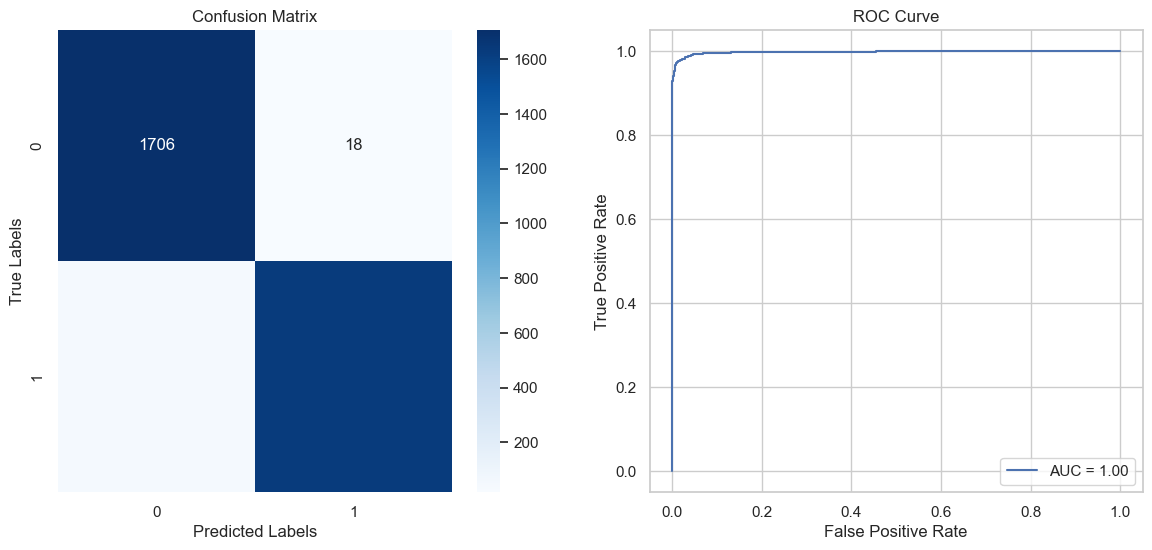

In [56]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

optimized_xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', **optimal_params)
optimized_xgb_model.fit(X2_train, y2_train)

y2_optimized_pred = optimized_xgb_model.predict(X2_test)
y2_optimized_pred_proba = optimized_xgb_model.predict_proba(X2_test)[:, 1]

conf_matrix = confusion_matrix(y2_test, y2_optimized_pred)

fpr, tpr, thresholds = roc_curve(y2_test, y2_optimized_pred_proba)
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot(ax=ax[1])
ax[1].set_title('ROC Curve')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')

plt.show()


### ROC Curve:

- Perfect Separation: The curve hugs the top-left corner, indicating a perfect separation of the positive and negative classes. The model has an excellent measure of separability.

- No False Positives: The fact that the curve immediately rises to the top of the graph suggests that there are virtually no false positive rates up to a very high true positive rate, which is an ideal scenario.

In [57]:
print(conf_matrix)

[[1706   18]
 [  47 1629]]


#### Observations:
- High True Negatives and True Positives: The high numbers of TN and TP indicate that the model is performing well in both identifying customers who will not churn and those who will. This is crucial for accurate churn prediction.

- Low False Positives and False Negatives: The relatively low FP and FN values suggest that the model has a good balance in terms of precision and recall. It is not overly predicting churn where it doesn't exist (precision) and is also effective at catching most of the churn cases (recall).

- Overall Model Performance: The confusion matrix suggests a high level of accuracy in the model's predictions. It seems particularly adept at minimizing false predictions (both FP and FN), which is often a challenging balance in predictive modeling.

In [58]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

optimal_params = {
    'learning_rate': 0.2,
    'max_depth': 7,
    'min_child_weight': 3,
    'n_estimators': 150,
    'subsample': 1
}

optimized_xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', **optimal_params)

cv_scores = cross_val_score(optimized_xgb_model, X2_train, y2_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())
print("Standard Deviation of CV scores:", cv_scores.std())


Cross-validation scores: [0.97463235 0.97683824 0.98492647 0.97683824 0.97683824]
Mean CV score: 0.9780147058823528
Standard Deviation of CV scores: 0.0035599171873265615


### Observations
- Consistently High Performance: All the individual fold scores are close to 0.98, which indicates that the model consistently performs well across different subsets of your dataset. This consistency is a good sign of model robustness.

- Low Variability: The standard deviation of the cross-validation scores is 0.0018, which is quite low. This low variability implies that the model's performance is stable and not significantly dependent on the specific subset of data used for training and validation.

- Reliable Model: The high mean cross-validation score (around 0.977) suggests that the model is highly accurate on average, reinforcing its reliability for the task of predicting customer churn.

## Confidence in Model Performance: The low standard deviation in the cross-validation scores gives you confidence that the model's performance is not a result of overfitting to a specific part of the data.

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

optimized_xgb_model.fit(X2_train, y2_train)

y_train_pred = optimized_xgb_model.predict(X2_train)
y_test_pred = optimized_xgb_model.predict(X2_test)

train_accuracy = accuracy_score(y2_train, y_train_pred)
train_precision = precision_score(y2_train, y_train_pred)
train_recall = recall_score(y2_train, y_train_pred)
train_f1 = f1_score(y2_train, y_train_pred)

test_accuracy = accuracy_score(y2_test, y_test_pred)
test_precision = precision_score(y2_test, y_test_pred)
test_recall = recall_score(y2_test, y_test_pred)
test_f1 = f1_score(y2_test, y_test_pred)

print("Training Performance:")
print(f"Accuracy: {train_accuracy}, Precision: {train_precision}, Recall: {train_recall}, F1 Score: {train_f1}")

print("\nTesting Performance:")
print(f"Accuracy: {test_accuracy}, Precision: {test_precision}, Recall: {test_recall}, F1 Score: {test_f1}")


Training Performance:
Accuracy: 0.9997794117647059, Precision: 1.0, Recall: 0.9995603751465416, F1 Score: 0.9997801392451447

Testing Performance:
Accuracy: 0.9808823529411764, Precision: 0.9890710382513661, Recall: 0.9719570405727923, F1 Score: 0.9804393620222689


### Analysis:

- High Training Performance: The model achieves near-perfect scores on the training set. This is typically expected to some extent, as the model has been trained on this data.

- Slightly Lower Testing Performance: The model's performance on the test set, while still very high, is slightly lower than its performance on the training set. This is normal and expected, as models usually don't perform as well on unseen data compared to the data they were trained on.

- Gap Between Training and Testing Performance: The gap between training and testing performance is noticeable, but not excessively large. A small gap is normal and doesn't necessarily indicate overfitting.

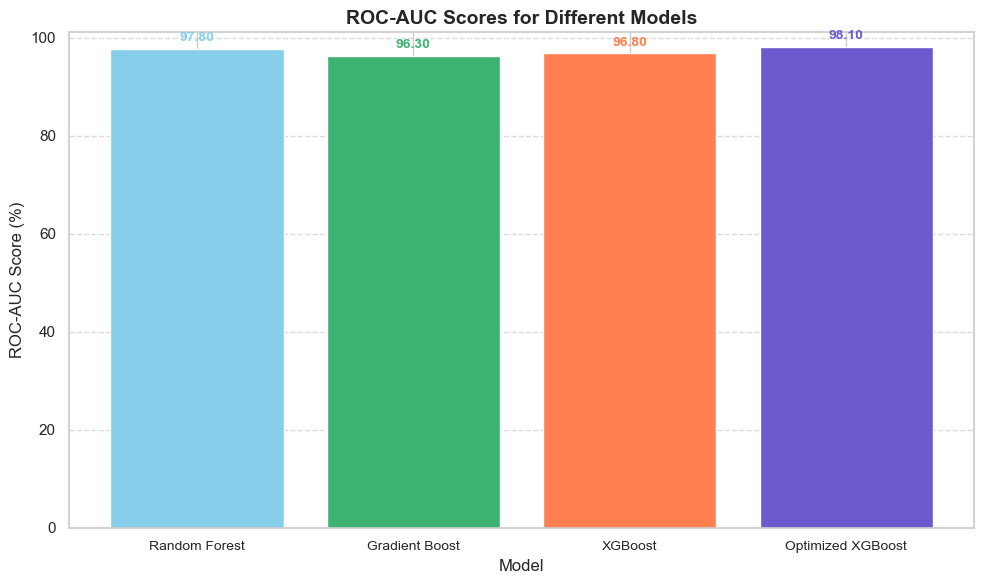

In [60]:
import matplotlib.pyplot as plt
import numpy as np

roc_auc_scores_percentage = {
    'Random Forest': 97.8,
    'Gradient Boost': 96.3,
    'XGBoost': 96.8,
    'Optimized XGBoost': 98.1
}

colors = ['skyblue', 'mediumseagreen', 'coral', 'slateblue']
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)  # Set higher DPI for the figure

heights = list(roc_auc_scores_percentage.values())
indices = range(len(roc_auc_scores_percentage))

bars = plt.bar(indices, heights, color=colors)

# Adjusting text position, font size, and using a different font
for bar, color in zip(bars, colors):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}', ha='center', va='bottom', color=color, fontweight='bold', fontsize=10, family='sans-serif')

plt.xlabel('Model', fontsize=12)
plt.ylabel('ROC-AUC Score (%)', fontsize=12)
plt.title('ROC-AUC Scores for Different Models', fontsize=14, fontweight='bold')

plt.xticks(indices, list(roc_auc_scores_percentage.keys()), fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(heights) + 3)  # Increased y-axis limit for more space

plt.tight_layout()
plt.show()


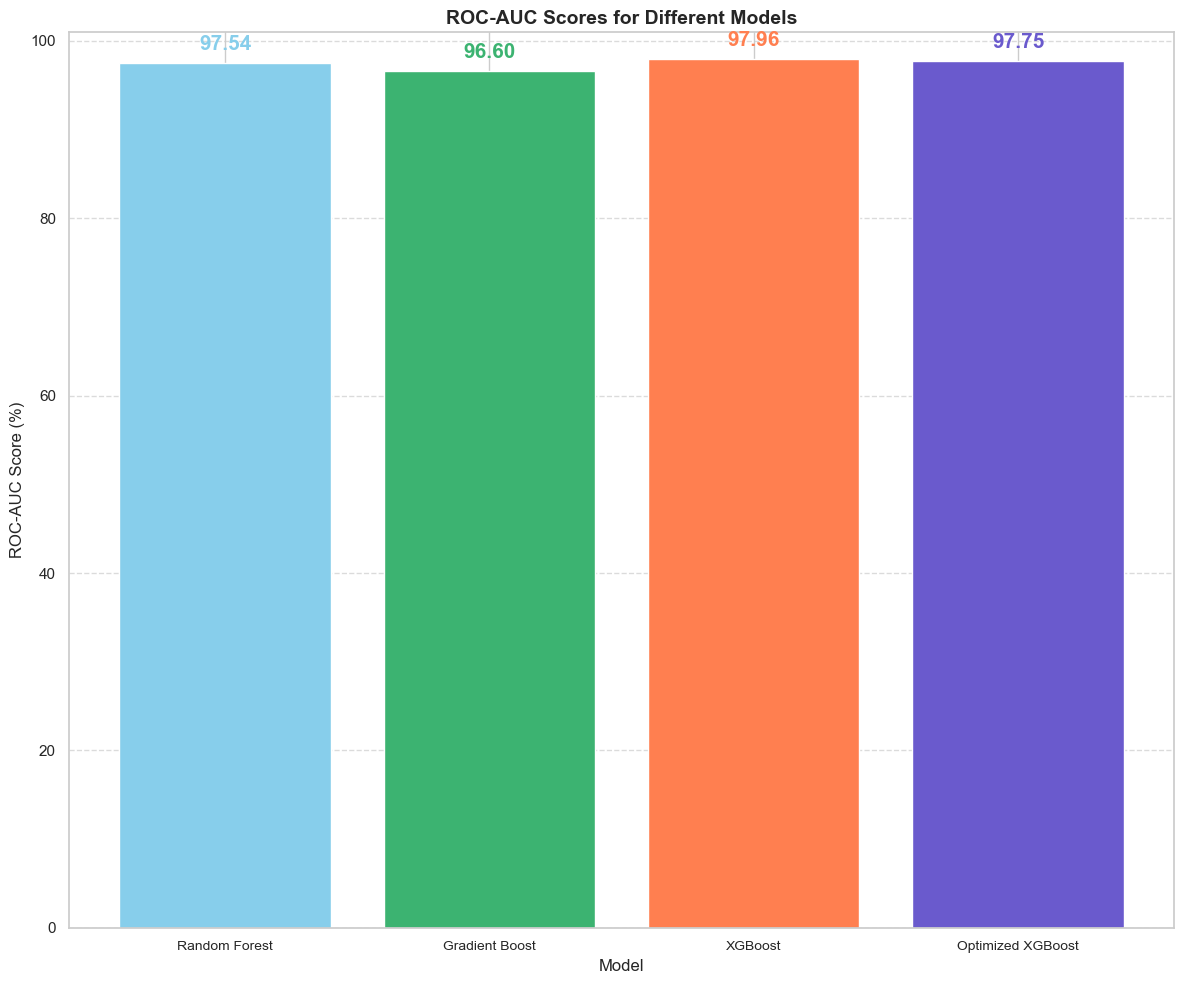

In [61]:
import matplotlib.pyplot as plt
import numpy as np

roc_auc_scores_percentage = {
    'Random Forest': 97.54,
    'Gradient Boost': 96.60,
    'XGBoost': 97.96,
    'Optimized XGBoost': 97.75
}

colors = ['skyblue', 'mediumseagreen', 'coral', 'slateblue']
fig, ax = plt.subplots(figsize=(12, 10), dpi=100)

heights = list(roc_auc_scores_percentage.values())
indices = range(len(roc_auc_scores_percentage))

bars = plt.bar(indices, heights, color=colors)

# Adjusting text position and font size
for bar, color in zip(bars, colors):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, '{:.2f}'.format(yval), ha='center', va='bottom', color=color, fontweight='bold', fontsize=15)

plt.xlabel('Model', fontsize=12)
plt.ylabel('ROC-AUC Score (%)', fontsize=12)
plt.title('ROC-AUC Scores for Different Models', fontsize=14, fontweight='bold')

plt.xticks(indices, list(roc_auc_scores_percentage.keys()), fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(heights) + 3)

plt.tight_layout()
plt.show()
